<a href="https://colab.research.google.com/github/kengrsls/PUBH-NHIS-Project/blob/main/NHIS_Recode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load required libraries
library(tidyverse)
library(broom)
library(knitr)

# Load the recoded dataset
data_recoded <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Ensure the recoded variables are set as factors with the desired levels and labels.
# (If they were already recoded and saved as factors, this step may be unnecessary.)
data_recoded <- data_recoded %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Income_Group = factor(Income_Group,
                          levels = c("Low Income", "Lower-Middle Income",
                                     "Upper-Middle Income", "High Income")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Fit the logistic regression model including all recoded predictors
model_all <- glm(ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + Income_Group + Ethnicity,
                 data = data_recoded,
                 family = binomial)

# Display the model summary
summary(model_all)

# Tidy the model output, exponentiating coefficients to get odds ratios and adding confidence intervals
tidy_model_all <- broom::tidy(model_all, exponentiate = TRUE, conf.int = TRUE)
print(tidy_model_all)

# Create a nicely formatted table of the results using knitr::kable
kable(tidy_model_all, digits = 3,
      caption = "Logistic Regression Results for Predicting Receipt of ST Therapy Services")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [ ]:
# Check the levels of each factor for potential issues
summary(data_recoded$FoodInsecurity)
summary(data_recoded$FoodAccessDifficulty)
summary(data_recoded$Income_Group)
summary(data_recoded$Ethnicity)
summary(data_recoded$ST_Therapy)

# Check frequency tables of relevant variables (Focus on predictors)
# table(data_recoded$FoodInsecurity, useNA="ifany")
# table(data_recoded$FoodAccessDifficulty, useNA="ifany")
# table(data_recoded$Income_Group, useNA="ifany")
# table(data_recoded$Ethnicity, useNA="ifany")

High Food Insecurity Moderate Food Insecurity     Mild Food Insecurity 
                    6624                      416                      263 
      No Food Insecurity                     NA's 
                       0                      161

Very Difficult   Somewhat Difficult   Not Very Difficult 
                6039                  585                  416 
Not At All Difficult                 NA's 
                 263                  161

Low Income Lower-Middle Income Upper-Middle Income         High Income 
               7464                   0                   0                   0

Hispanic Non-Hispanic 
        1967         5497

Received ST Therapy Did Not Receive ST Therapy 
                       270                        470 
                      NA's 
                      6724


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




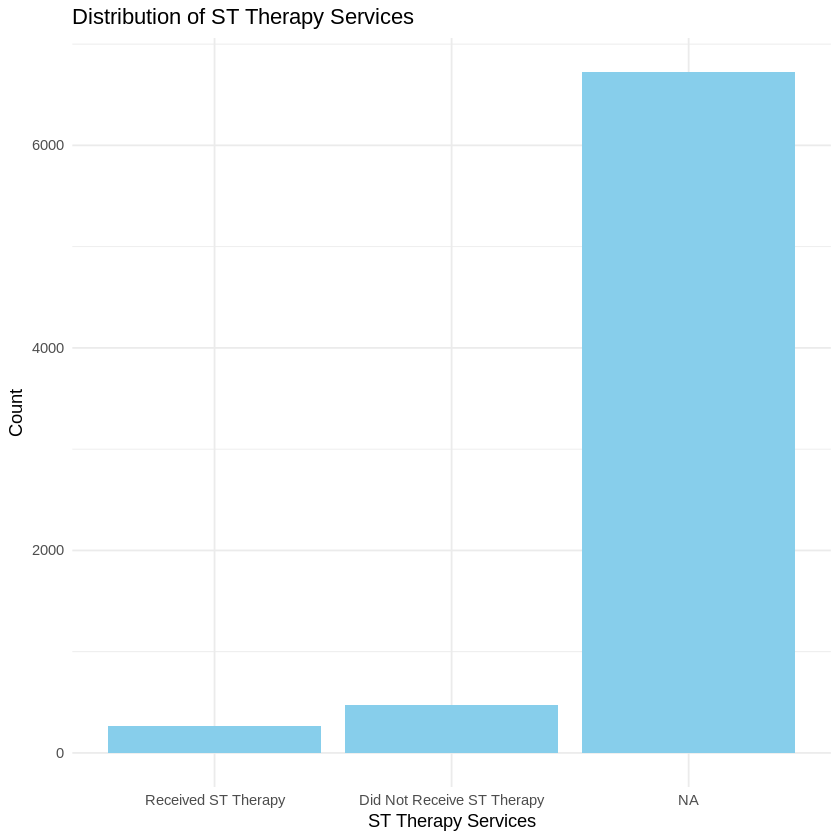

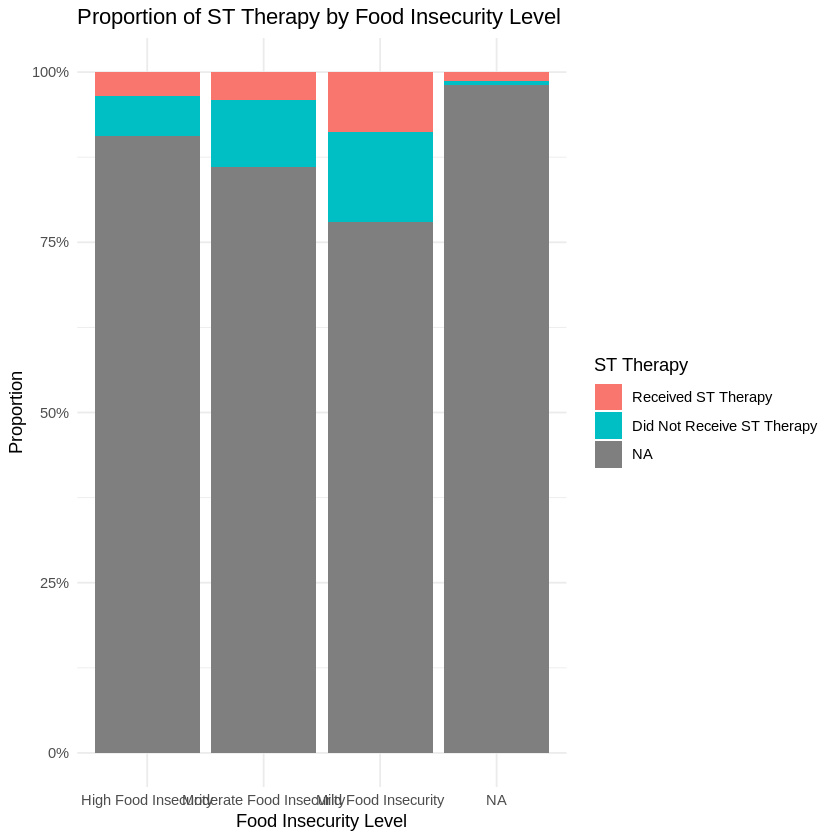

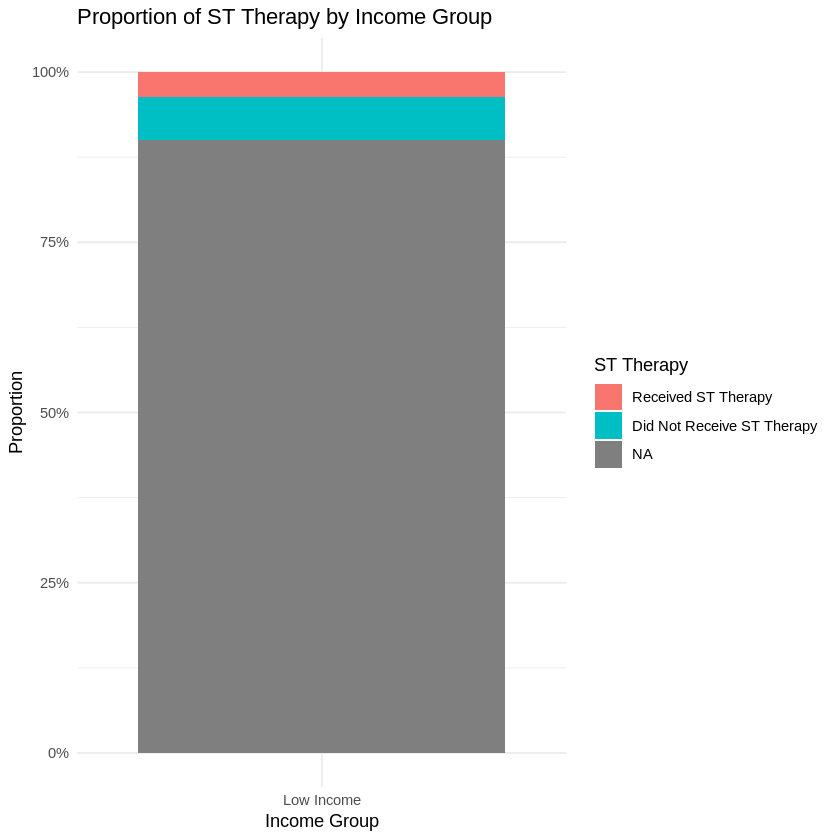

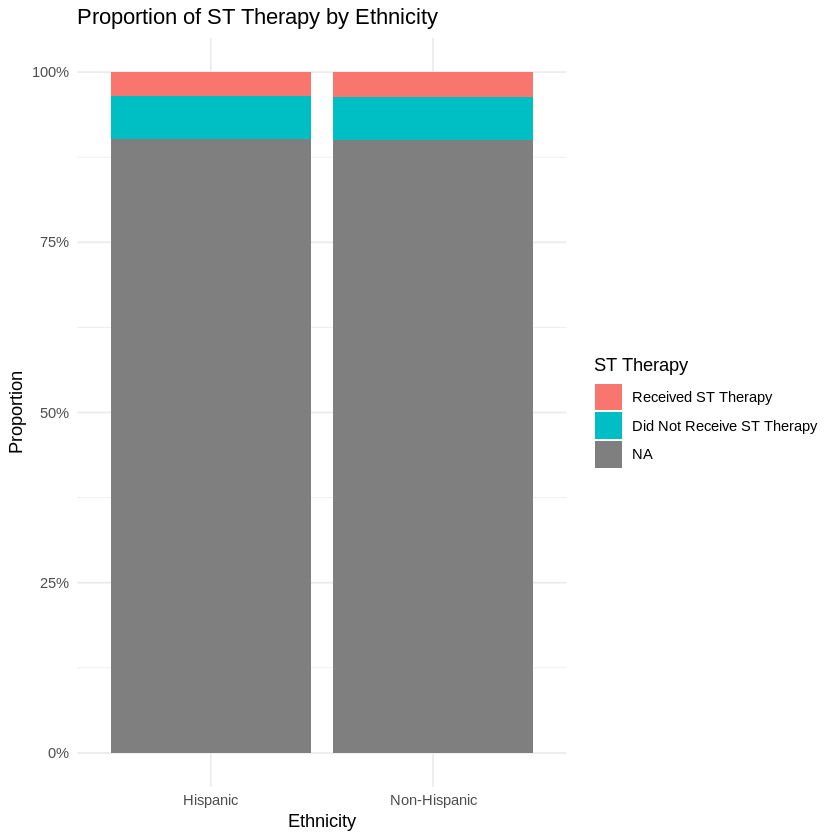

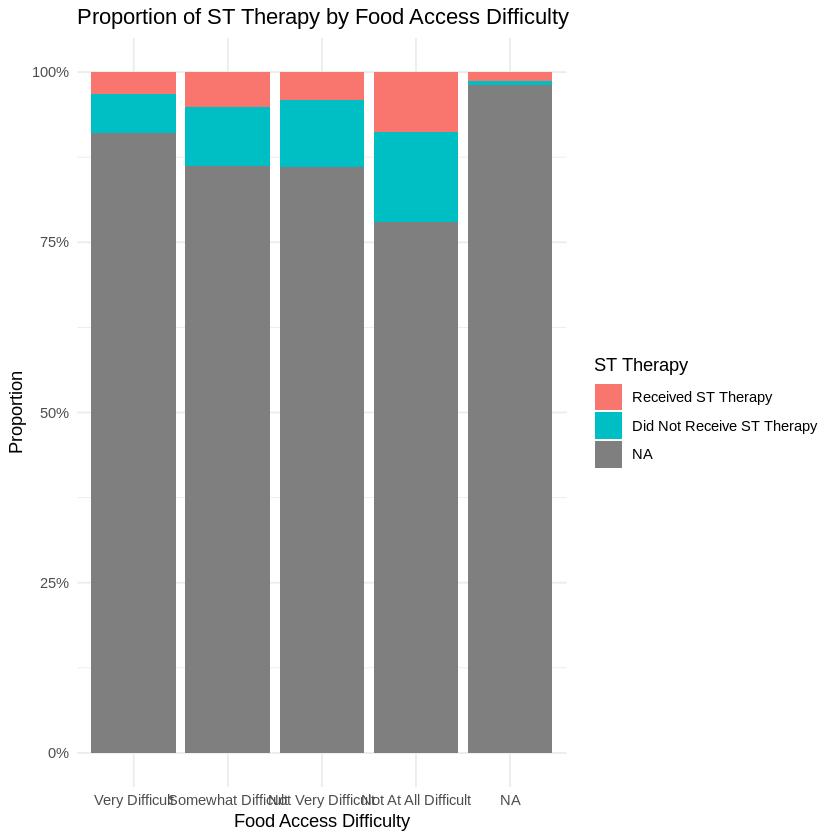

In [ ]:
# Load necessary libraries
library(tidyverse)
library(scales)   # for percent formatting in plots

# Load the recoded dataset
data_recoded <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Ensure the recoded variables are factors with the intended levels (if not already saved as factors)
data_recoded <- data_recoded %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Income_Group = factor(Income_Group,
                          levels = c("Low Income", "Lower-Middle Income",
                                     "Upper-Middle Income", "High Income")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Plot 1: Overall distribution of ST Therapy services
ggplot(data_recoded, aes(x = ST_Therapy)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Distribution of ST Therapy Services",
       x = "ST Therapy Services",
       y = "Count") +
  theme_minimal()

# Plot 2: Proportion of ST Therapy by Food Insecurity
ggplot(data_recoded, aes(x = FoodInsecurity, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Food Insecurity Level",
       x = "Food Insecurity Level",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

# Plot 3: Proportion of ST Therapy by Income Group
ggplot(data_recoded, aes(x = Income_Group, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Income Group",
       x = "Income Group",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

# Plot 4: Proportion of ST Therapy by Ethnicity
ggplot(data_recoded, aes(x = Ethnicity, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Ethnicity",
       x = "Ethnicity",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

# Optional Plot 5: Proportion of ST Therapy by Food Access Difficulty
ggplot(data_recoded, aes(x = FoodAccessDifficulty, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Food Access Difficulty",
       x = "Food Access Difficulty",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()


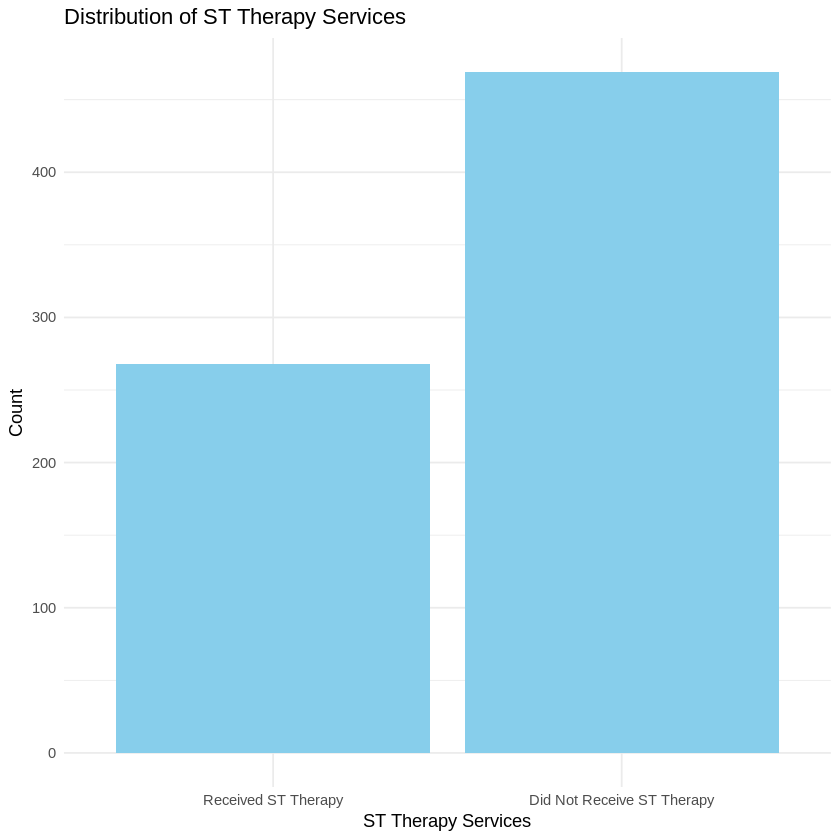

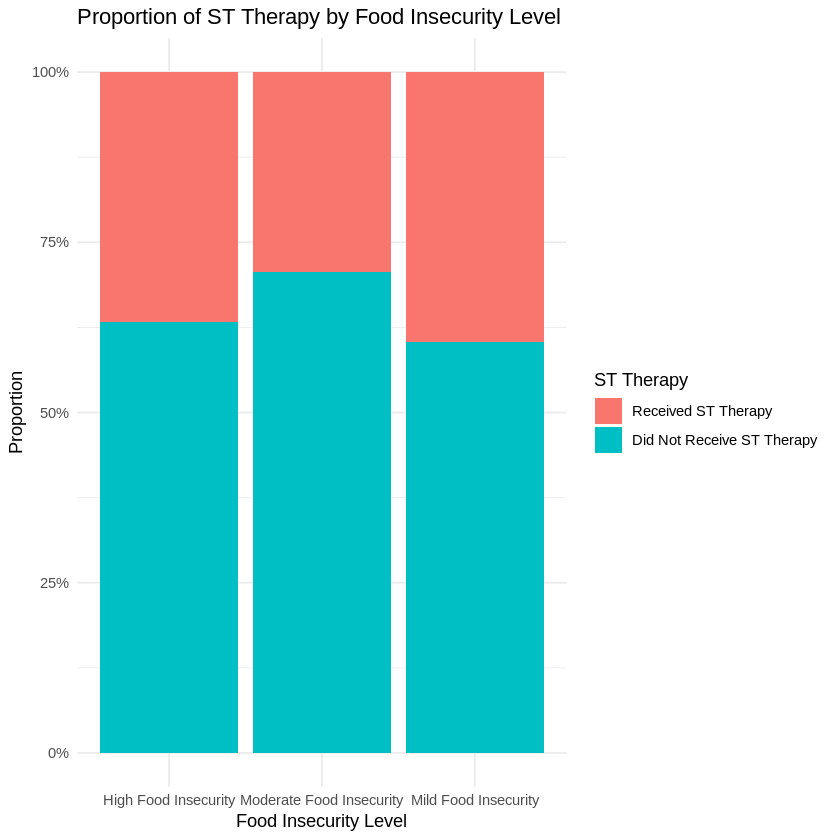

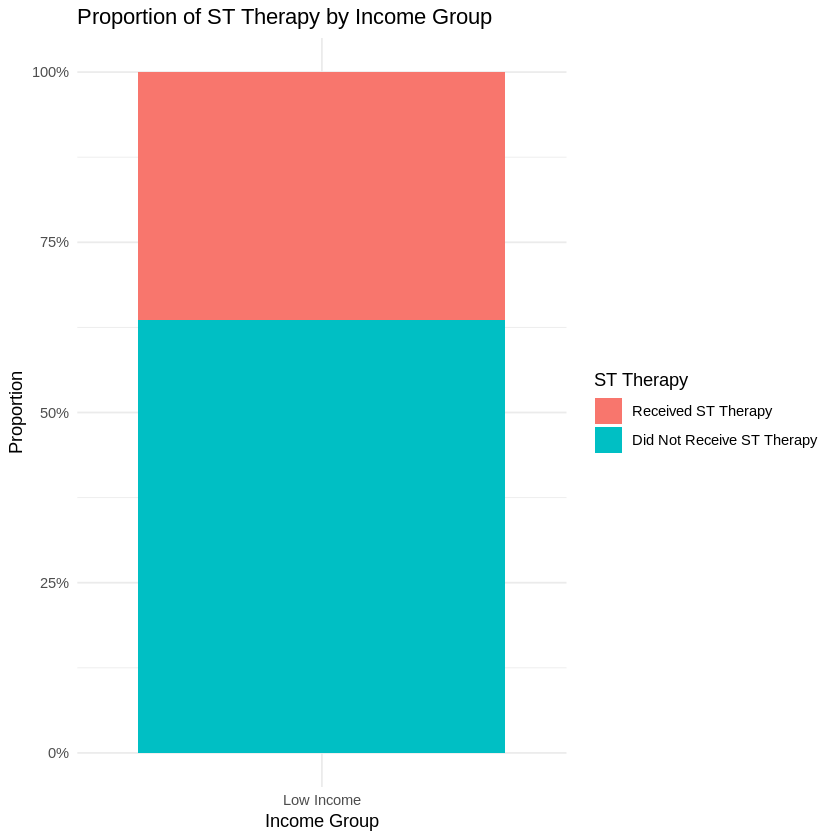

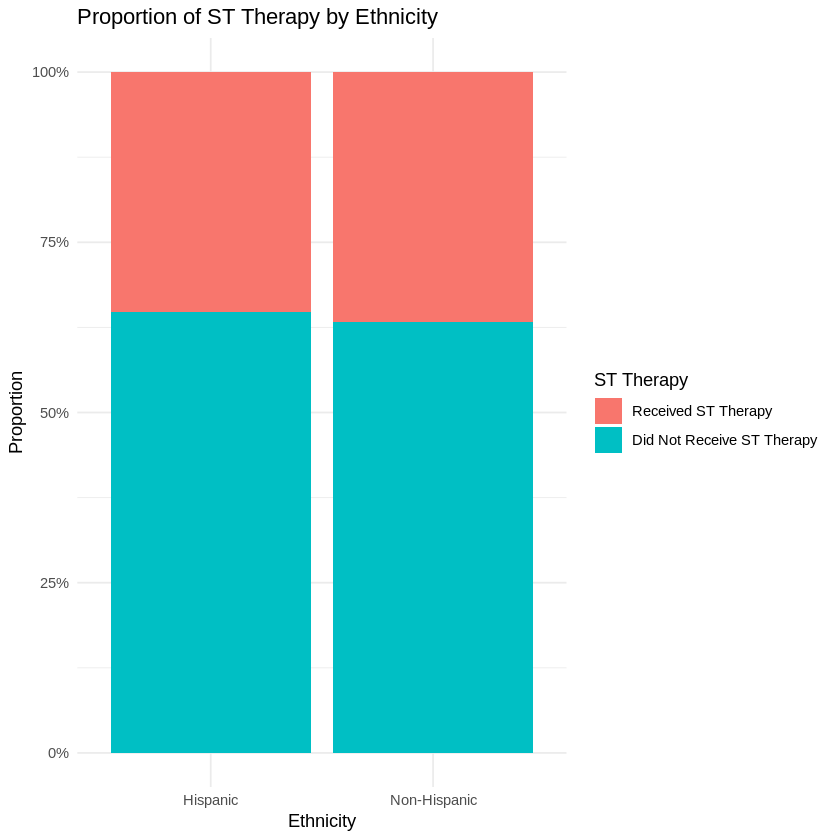

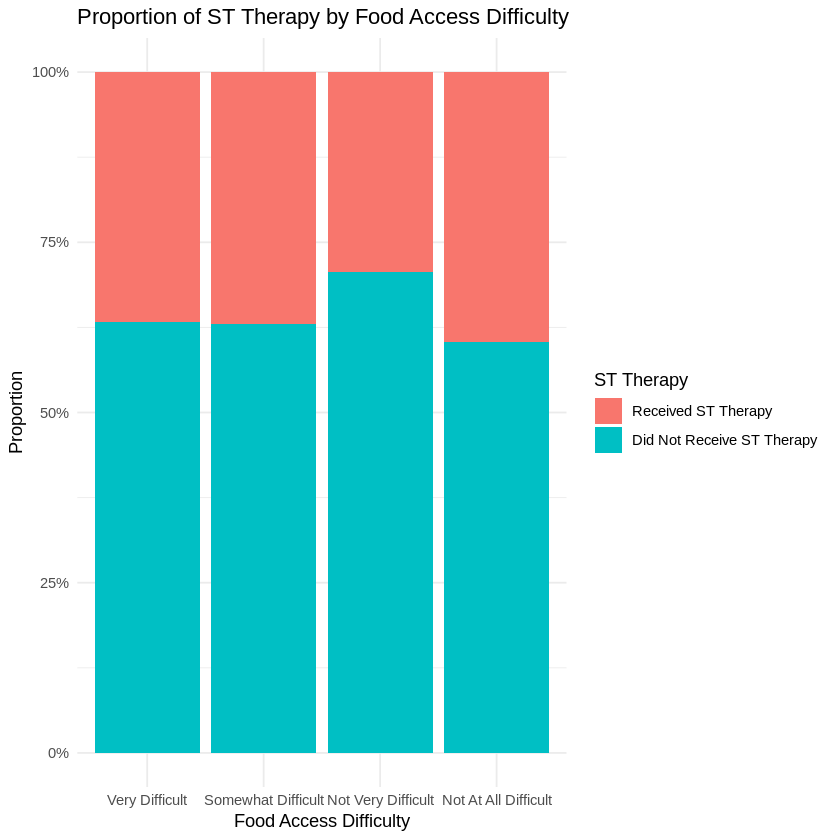

In [ ]:
# Load necessary libraries
library(tidyverse)
library(scales)

# Load the recoded dataset
data_recoded <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Ensure the recoded variables are set as factors with the intended levels and labels
data_recoded <- data_recoded %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Income_Group = factor(Income_Group,
                          levels = c("Low Income", "Lower-Middle Income",
                                     "Upper-Middle Income", "High Income")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Filter out rows with NA values for any of the key variables
data_filtered <- data_recoded %>%
  filter(!is.na(FoodInsecurity) &
         !is.na(FoodAccessDifficulty) &
         !is.na(Income_Group) &
         !is.na(Ethnicity) &
         !is.na(ST_Therapy))

# Plot 1: Overall distribution of ST Therapy Services
ggplot(data_filtered, aes(x = ST_Therapy)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Distribution of ST Therapy Services",
       x = "ST Therapy Services",
       y = "Count") +
  theme_minimal()

# Plot 2: Proportion of ST Therapy by Food Insecurity
ggplot(data_filtered, aes(x = FoodInsecurity, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Food Insecurity Level",
       x = "Food Insecurity Level",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

# Plot 3: Proportion of ST Therapy by Income Group
ggplot(data_filtered, aes(x = Income_Group, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Income Group",
       x = "Income Group",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

# Plot 4: Proportion of ST Therapy by Ethnicity
ggplot(data_filtered, aes(x = Ethnicity, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Ethnicity",
       x = "Ethnicity",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

# Plot 5: Proportion of ST Therapy by Food Access Difficulty
ggplot(data_filtered, aes(x = FoodAccessDifficulty, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of ST Therapy by Food Access Difficulty",
       x = "Food Access Difficulty",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()


`summarise()` has grouped output by 'Ethnicity'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Income_Group'. You can override using the
`.groups` argument.


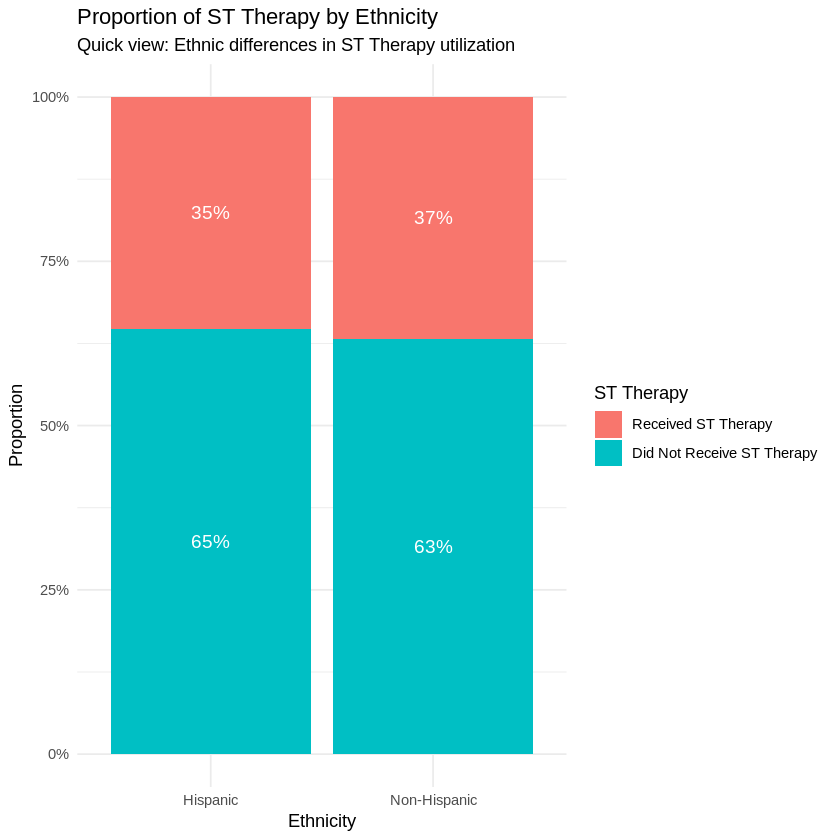

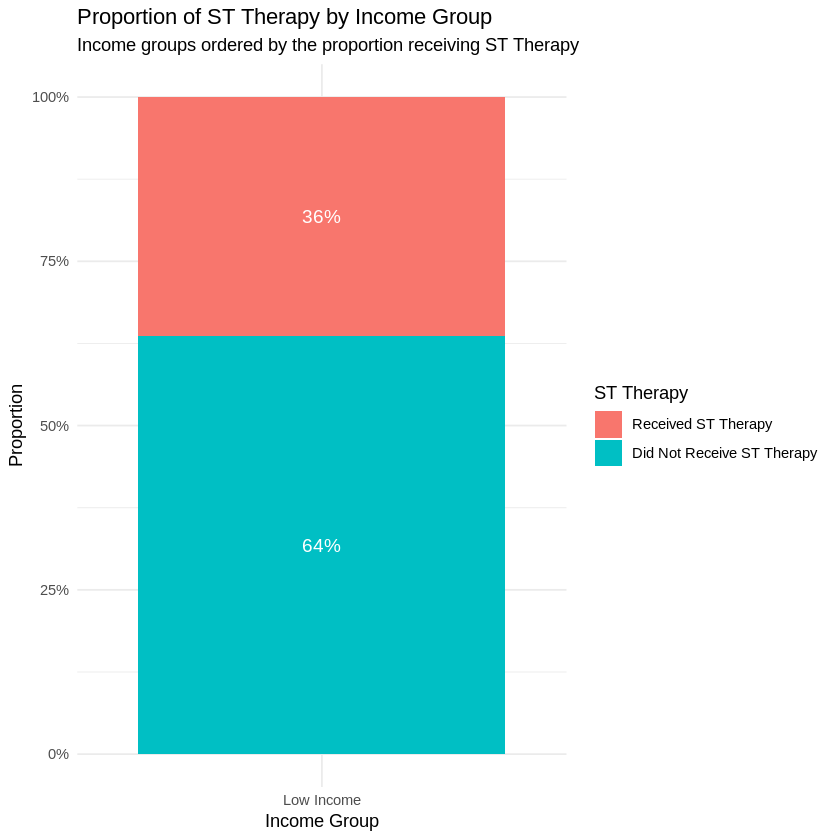

In [ ]:
# Load necessary libraries
library(tidyverse)
library(scales)

# Load the recoded dataset (assumes "child22recoded.csv" is in your working directory)
data_recoded <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Convert key variables to factors with appropriate levels and labels
data_recoded <- data_recoded %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Income_Group = factor(Income_Group,
                          levels = c("Low Income", "Lower-Middle Income",
                                     "Upper-Middle Income", "High Income")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Filter out rows with any NA in the key variables
data_filtered <- data_recoded %>%
  filter(!is.na(FoodInsecurity) &
         !is.na(FoodAccessDifficulty) &
         !is.na(Income_Group) &
         !is.na(Ethnicity) &
         !is.na(ST_Therapy))

### Chart 1: Proportion of ST Therapy by Ethnicity with Annotations

# Create a summary for annotations (proportions within each Ethnicity)
ethnicity_summary <- data_filtered %>%
  group_by(Ethnicity, ST_Therapy) %>%
  summarise(count = n()) %>%
  group_by(Ethnicity) %>%
  mutate(prop = count / sum(count))

ggplot(data_filtered, aes(x = Ethnicity, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  # Add percentage labels inside the bars
  geom_text(data = ethnicity_summary,
            aes(label = scales::percent(prop, accuracy = 1), y = prop/2),
            position = position_fill(vjust = 0.5),
            color = "white", size = 4) +
  labs(
    title = "Proportion of ST Therapy by Ethnicity",
    subtitle = "Quick view: Ethnic differences in ST Therapy utilization",
    x = "Ethnicity",
    y = "Proportion",
    fill = "ST Therapy"
  ) +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

### Chart 2: Proportion of ST Therapy by Income Group with Ordered Categories and Annotations

# First, compute summary statistics for Income_Group
income_summary <- data_filtered %>%
  group_by(Income_Group, ST_Therapy) %>%
  summarise(count = n()) %>%
  group_by(Income_Group) %>%
  mutate(prop = count / sum(count))

# Reorder Income_Group based on the proportion of "Received ST Therapy"
income_order <- income_summary %>%
  filter(ST_Therapy == "Received ST Therapy") %>%
  arrange(desc(prop)) %>%
  pull(Income_Group)

# Apply the new order
data_filtered$Income_Group <- factor(data_filtered$Income_Group, levels = income_order)
income_summary$Income_Group <- factor(income_summary$Income_Group, levels = income_order)

ggplot(data_filtered, aes(x = Income_Group, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  geom_text(data = income_summary,
            aes(label = scales::percent(prop, accuracy = 1), y = prop/2),
            position = position_fill(vjust = 0.5),
            color = "white", size = 4) +
  labs(
    title = "Proportion of ST Therapy by Income Group",
    subtitle = "Income groups ordered by the proportion receiving ST Therapy",
    x = "Income Group",
    y = "Proportion",
    fill = "ST Therapy"
  ) +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()


`summarise()` has grouped output by 'Ethnicity'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Income_Group'. You can override using the
`.groups` argument.


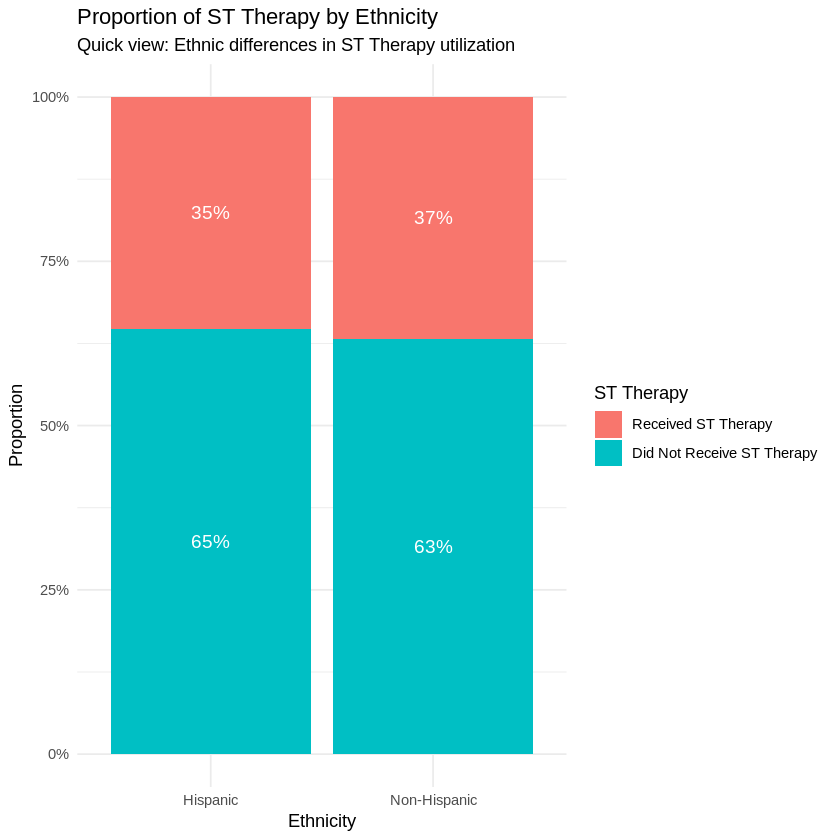

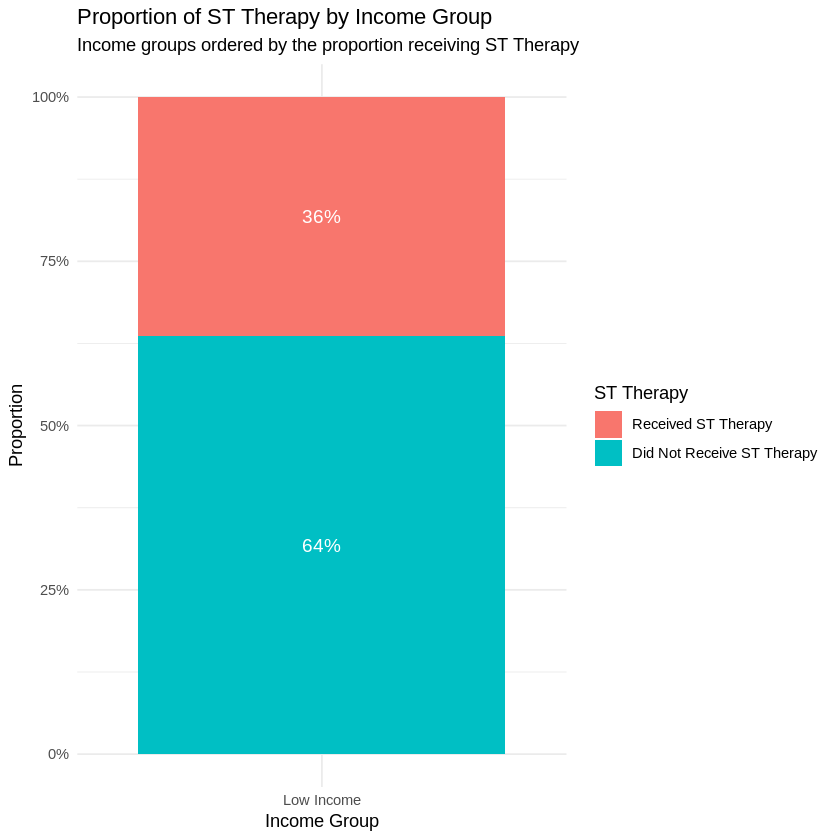

In [ ]:
# Load necessary libraries
library(tidyverse)
library(scales)

# Load the recoded dataset (assumes "child22recoded.csv" is in your working directory)
data_recoded <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Convert key variables to factors with appropriate levels and labels
data_recoded <- data_recoded %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Income_Group = factor(Income_Group,
                          levels = c("Low Income", "Lower-Middle Income",
                                     "Upper-Middle Income", "High Income")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Filter out rows with any NA in the key variables
data_filtered <- data_recoded %>%
  filter(!is.na(FoodInsecurity) &
         !is.na(FoodAccessDifficulty) &
         !is.na(Income_Group) &
         !is.na(Ethnicity) &
         !is.na(ST_Therapy))

### Chart 1: Proportion of ST Therapy by Ethnicity with Annotations

# Create a summary for annotations (proportions within each Ethnicity)
ethnicity_summary <- data_filtered %>%
  group_by(Ethnicity, ST_Therapy) %>%
  summarise(count = n()) %>%
  group_by(Ethnicity) %>%
  mutate(prop = count / sum(count))

ggplot(data_filtered, aes(x = Ethnicity, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  # Add percentage labels inside the bars
  geom_text(data = ethnicity_summary,
            aes(label = scales::percent(prop, accuracy = 1), y = prop/2),
            position = position_fill(vjust = 0.5),
            color = "white", size = 4) +
  labs(
    title = "Proportion of ST Therapy by Ethnicity",
    subtitle = "Quick view: Ethnic differences in ST Therapy utilization",
    x = "Ethnicity",
    y = "Proportion",
    fill = "ST Therapy"
  ) +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()

### Chart 2: Proportion of ST Therapy by Income Group with Ordered Categories and Annotations

# First, compute summary statistics for Income_Group
income_summary <- data_filtered %>%
  group_by(Income_Group, ST_Therapy) %>%
  summarise(count = n()) %>%
  group_by(Income_Group) %>%
  mutate(prop = count / sum(count))

# Reorder Income_Group based on the proportion of "Received ST Therapy"
income_order <- income_summary %>%
  filter(ST_Therapy == "Received ST Therapy") %>%
  arrange(desc(prop)) %>%
  pull(Income_Group)

# Apply the new order
data_filtered$Income_Group <- factor(data_filtered$Income_Group, levels = income_order)
income_summary$Income_Group <- factor(income_summary$Income_Group, levels = income_order)

ggplot(data_filtered, aes(x = Income_Group, fill = ST_Therapy)) +
  geom_bar(position = "fill") +
  geom_text(data = income_summary,
            aes(label = scales::percent(prop, accuracy = 1), y = prop/2),
            position = position_fill(vjust = 0.5),
            color = "white", size = 4) +
  labs(
    title = "Proportion of ST Therapy by Income Group",
    subtitle = "Income groups ordered by the proportion receiving ST Therapy",
    x = "Income Group",
    y = "Proportion",
    fill = "ST Therapy"
  ) +
  scale_y_continuous(labels = percent_format()) +
  theme_minimal()


In [ ]:
# Load necessary libraries
library(tidyverse)
library(survey)
library(scales)

# Load the recoded dataset (ensure "child22recoded.csv" is in your working directory)
data <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Recode key variables using the original variable names
data <- data %>%
  mutate(
    # Recode Food Insecurity using FoodInsecurity_Orig (assumed coding: 1,2,3,4)
    FoodInsecurity = factor(FoodInsecurity_Orig,
                            levels = c(1, 2, 3, 4),
                            labels = c("High Food Insecurity",
                                       "Moderate Food Insecurity",
                                       "Mild Food Insecurity",
                                       "No Food Insecurity")),
    # Recode Food Access Difficulty using FoodAccessDifficulty_Orig (assumed coding: 1,2,3,4)
    FoodAccessDifficulty = factor(FoodAccessDifficulty_Orig,
                                  levels = c(1, 2, 3, 4),
                                  labels = c("Very Difficult",
                                             "Somewhat Difficult",
                                             "Not Very Difficult",
                                             "Not At All Difficult")),
    # Convert Income_Wages_Orig to numeric and create Income_Group
    Income_Wages = as.numeric(Income_Wages_Orig),
    Income_Group = cut(Income_Wages,
                       breaks = c(0, 20000, 40000, 60000, Inf),
                       labels = c("Low Income",
                                  "Lower-Middle Income",
                                  "Upper-Middle Income",
                                  "High Income"),
                       right = FALSE),
    # Recode Ethnicity using Ethnicity_Orig (assumed coding: 1 = Hispanic, 2 = Non-Hispanic)
    Ethnicity = factor(Ethnicity_Orig,
                       levels = c(1, 2),
                       labels = c("Hispanic", "Non-Hispanic")),
    # Recode ST_Therapy using ST_Therapy_Orig:
    # Missing values, or codes 2, 8, 9, are recoded as "Did Not Receive ST Therapy"
    # Code 1 is recoded as "Received ST Therapy"
    ST_Therapy = case_when(
      is.na(ST_Therapy_Orig) ~ "Did Not Receive ST Therapy",
      ST_Therapy_Orig == 1 ~ "Received ST Therapy",
      ST_Therapy_Orig %in% c(2, 8, 9) ~ "Did Not Receive ST Therapy",
      TRUE ~ "Did Not Receive ST Therapy"
    ),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Filter out rows with missing values in the key variables (except ST_Therapy, which is now fully recoded)
data_filtered <- data %>%
  filter(!is.na(FoodInsecurity),
         !is.na(FoodAccessDifficulty),
         !is.na(Income_Group),
         !is.na(Ethnicity))
         # Note: We do not filter on ST_Therapy since we recoded all missing values

# Check the recoding for ST_Therapy by printing its frequency table
cat("Frequency table for ST_Therapy:\n")
print(table(data_filtered$ST_Therapy, useNA = "ifany"))

# Create the survey design object using NHIS design variables (WTFA_C, PSTRAT, PPSU)
nhis_design <- svydesign(ids = ~PPSU,
                         strata = ~PSTRAT,
                         weights = ~WTFA_C,
                         data = data_filtered,
                         nest = TRUE)

# The data and survey design object are now ready for analysis.


Frequency table for ST_Therapy:

       Received ST Therapy Did Not Receive ST Therapy 
                       268                       7035 


'data.frame':	7464 obs. of  438 variables:
 $ URBRRL                   : int  1 4 3 3 3 3 3 3 3 1 ...
 $ RATCAT_C                 : int  14 4 11 13 2 14 14 11 11 14 ...
 $ INCTCFLG_C               : int  1 0 0 0 0 0 0 0 0 0 ...
 $ IMPINCFLG_C              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PPSU                     : int  2 3 1 4 2 1 1 1 1 3 ...
 $ PSTRAT                   : int  115 122 103 103 103 111 111 143 111 138 ...
 $ HISPALLP_C               : int  2 2 3 3 3 2 2 3 4 2 ...
 $ RACEALLP_C               : int  1 1 2 2 2 1 1 2 3 1 ...
 $ SDQIMPTOT_C              : int  NA NA NA 2 0 NA NA NA NA 0 ...
 $ SDQTOT_C                 : int  2 3 NA 15 8 6 6 NA NA 9 ...
 $ SDQPROS_C                : int  10 10 NA 10 9 10 10 NA NA 8 ...
 $ SDQPEER_C                : int  0 1 NA 3 2 2 2 NA NA 3 ...
 $ SDQHYPE_C                : int  2 0 NA 7 5 3 2 NA NA 4 ...
 $ SDQCOND_C                : int  0 2 NA 0 1 0 1 NA NA 2 ...
 $ SDQEMOT_C                : int  0 0 NA 5 0 1 1 NA NA 0 ...
 $ SCHDYMSSTC

WTFA_C                    PSTRAT                      PPSU 
                "numeric"                 "integer"                 "integer" 
      FoodInsecurity_Orig FoodAccessDifficulty_Orig         Income_Wages_Orig 
                "integer"                 "integer"                 "integer" 
           Ethnicity_Orig           ST_Therapy_Orig 
                "integer"                 "integer"

FoodInsecurity_Orig frequencies:

   1    2    3    8 
6624  416  263  161 

FoodAccessDifficulty_Orig frequencies:

   1    2    3    4    8 
6039  585  416  263  161 

Ethnicity_Orig frequencies:

   1    2 
1967 5497 

ST_Therapy_Orig frequencies:

   1    2    8    9 <NA> 
 270  470    1    1 6722 

Income_Wages summary:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.217   1.000   9.000 


Missing value counts:
      FoodInsecurity_Orig FoodAccessDifficulty_Orig         Income_Wages_Orig 
                        0                         0                         0 
           Ethnicity_Orig           ST_Therapy_Orig                    WTFA_C 
                        0                      6722                         0 
                   PSTRAT                      PPSU 
                        0                         0 


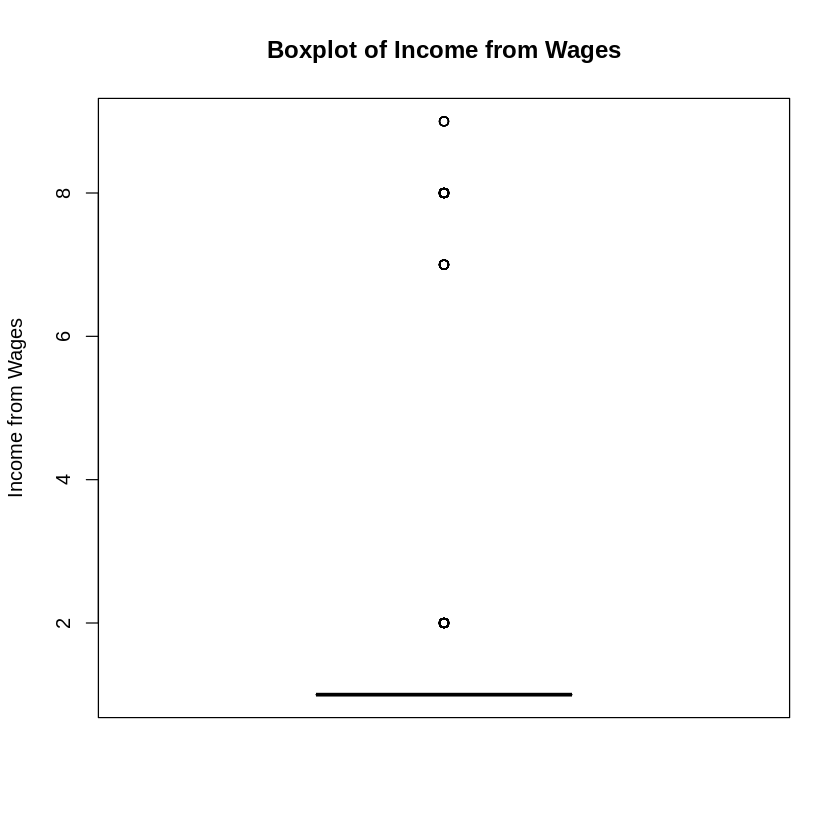

In [ ]:
# Load necessary libraries
library(tidyverse)

# Load the dataset
data <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Check the overall structure and data types of the dataset
str(data)

# Check variable types for survey design variables and key original variables
sapply(data[, c("WTFA_C", "PSTRAT", "PPSU", "FoodInsecurity_Orig",
                "FoodAccessDifficulty_Orig", "Income_Wages_Orig",
                "Ethnicity_Orig", "ST_Therapy_Orig")], class)

# Frequency distributions for original key variables to detect special missing codes
cat("FoodInsecurity_Orig frequencies:\n")
print(table(data$FoodInsecurity_Orig, useNA = "ifany"))

cat("\nFoodAccessDifficulty_Orig frequencies:\n")
print(table(data$FoodAccessDifficulty_Orig, useNA = "ifany"))

cat("\nEthnicity_Orig frequencies:\n")
print(table(data$Ethnicity_Orig, useNA = "ifany"))

cat("\nST_Therapy_Orig frequencies:\n")
print(table(data$ST_Therapy_Orig, useNA = "ifany"))

# Check summary statistics for Income_Wages_Orig (converted to numeric)
data$Income_Wages <- as.numeric(data$Income_Wages_Orig)
cat("\nIncome_Wages summary:\n")
summary(data$Income_Wages)

# Create a boxplot for Income_Wages to visually inspect for outliers
boxplot(data$Income_Wages, main = "Boxplot of Income from Wages", ylab = "Income from Wages")

# Count missing values across the key variables (including survey design variables)
missing_counts <- colSums(is.na(data[, c("FoodInsecurity_Orig", "FoodAccessDifficulty_Orig",
                                          "Income_Wages_Orig", "Ethnicity_Orig", "ST_Therapy_Orig",
                                          "WTFA_C", "PSTRAT", "PPSU")]))
cat("\nMissing value counts:\n")
print(missing_counts)


In [ ]:
# Load necessary library (assuming tidyverse is already loaded)
library(tidyverse)

# Check the overall structure of the dataset
str(data)

# Check summary statistics for survey design variables
cat("Survey design variables summary:\n")
print(sapply(data[, c("WTFA_C", "PSTRAT", "PPSU")], summary))

# Check that the key recoded variables are present and have the correct classes
cat("\nKey recoded variable classes:\n")
print(sapply(data[, c("FoodInsecurity", "FoodAccessDifficulty", "Income_Group", "Ethnicity", "ST_Therapy")], class))

# Display frequency tables for each key recoded variable
cat("\nFrequency table for FoodInsecurity:\n")
print(table(data$FoodInsecurity, useNA = "ifany"))

cat("\nFrequency table for FoodAccessDifficulty:\n")
print(table(data$FoodAccessDifficulty, useNA = "ifany"))

cat("\nFrequency table for Income_Group:\n")
print(table(data$Income_Group, useNA = "ifany"))

cat("\nFrequency table for Ethnicity:\n")
print(table(data$Ethnicity, useNA = "ifany"))

cat("\nFrequency table for ST_Therapy:\n")
print(table(data$ST_Therapy, useNA = "ifany"))

# Check for missing values in key variables (including survey design variables)
key_vars <- c("FoodInsecurity", "FoodAccessDifficulty", "Income_Group", "Ethnicity", "ST_Therapy", "WTFA_C", "PSTRAT", "PPSU")
missing_counts <- colSums(is.na(data[, key_vars]))
cat("\nMissing value counts in key variables:\n")
print(missing_counts)


'data.frame':	7464 obs. of  438 variables:
 $ URBRRL                   : int  1 4 3 3 3 3 3 3 3 1 ...
 $ RATCAT_C                 : int  14 4 11 13 2 14 14 11 11 14 ...
 $ INCTCFLG_C               : int  1 0 0 0 0 0 0 0 0 0 ...
 $ IMPINCFLG_C              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PPSU                     : int  2 3 1 4 2 1 1 1 1 3 ...
 $ PSTRAT                   : int  115 122 103 103 103 111 111 143 111 138 ...
 $ HISPALLP_C               : int  2 2 3 3 3 2 2 3 4 2 ...
 $ RACEALLP_C               : int  1 1 2 2 2 1 1 2 3 1 ...
 $ SDQIMPTOT_C              : int  NA NA NA 2 0 NA NA NA NA 0 ...
 $ SDQTOT_C                 : int  2 3 NA 15 8 6 6 NA NA 9 ...
 $ SDQPROS_C                : int  10 10 NA 10 9 10 10 NA NA 8 ...
 $ SDQPEER_C                : int  0 1 NA 3 2 2 2 NA NA 3 ...
 $ SDQHYPE_C                : int  2 0 NA 7 5 3 2 NA NA 4 ...
 $ SDQCOND_C                : int  0 2 NA 0 1 0 1 NA NA 2 ...
 $ SDQEMOT_C                : int  0 0 NA 5 0 1 1 NA NA 0 ...
 $ SCHDYMSSTC

In [ ]:
# Load necessary libraries
library(tidyverse)
library(survey)
library(scales)

# Load the recoded dataset (ensure "child22recoded.csv" is in your working directory)
data <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Recode key variables:
data <- data %>%
  mutate(
    # Recode Food Insecurity using FoodInsecurity_Orig
    FoodInsecurity = factor(FoodInsecurity_Orig,
                            levels = c(1, 2, 3, 4),
                            labels = c("High Food Insecurity",
                                       "Moderate Food Insecurity",
                                       "Mild Food Insecurity",
                                       "No Food Insecurity")),
    # Recode Food Access Difficulty using FoodAccessDifficulty_Orig
    FoodAccessDifficulty = factor(FoodAccessDifficulty_Orig,
                                  levels = c(1, 2, 3, 4),
                                  labels = c("Very Difficult",
                                             "Somewhat Difficult",
                                             "Not Very Difficult",
                                             "Not At All Difficult")),
    # Convert Income_Wages_Orig to numeric and then create Income_Group
    Income_Wages = as.numeric(Income_Wages_Orig),
    Income_Group = cut(Income_Wages,
                       breaks = c(0, 20000, 40000, 60000, Inf),
                       labels = c("Low Income",
                                  "Lower-Middle Income",
                                  "Upper-Middle Income",
                                  "High Income"),
                       right = FALSE),
    # Recode Ethnicity using Ethnicity_Orig (assumed coding: 1 = Hispanic, 2 = Non-Hispanic)
    Ethnicity = factor(Ethnicity_Orig,
                       levels = c(1, 2),
                       labels = c("Hispanic", "Non-Hispanic")),
    # Recode ST_Therapy using ST_Therapy_Orig:
    # If missing or if the code is 2, 8, or 9, then recode to "Did Not Receive ST Therapy"
    # Otherwise (code 1), recode to "Received ST Therapy"
    ST_Therapy = if_else(is.na(ST_Therapy_Orig) | ST_Therapy_Orig %in% c(2, 8, 9),
                         "Did Not Receive ST Therapy", "Received ST Therapy"),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Verify the recoding by printing the frequency table for ST_Therapy
cat("Frequency table for ST_Therapy:\n")
print(table(data$ST_Therapy, useNA = "ifany"))

# (Optional) Check missing value counts in key variables:
key_vars <- c("FoodInsecurity", "FoodAccessDifficulty", "Income_Group", "Ethnicity", "ST_Therapy", "WTFA_C", "PSTRAT", "PPSU")
missing_counts <- colSums(is.na(data[, key_vars]))
cat("\nMissing value counts in key variables:\n")
print(missing_counts)

# Create the survey design object using the NHIS design variables, if ready for analysis:
nhis_design <- svydesign(ids = ~PPSU,
                         strata = ~PSTRAT,
                         weights = ~WTFA_C,
                         data = data,
                         nest = TRUE)

# (Optional) Print summary of the survey design object:
summary(nhis_design)


Frequency table for ST_Therapy:

       Received ST Therapy Did Not Receive ST Therapy 
                       270                       7194 

Missing value counts in key variables:
      FoodInsecurity FoodAccessDifficulty         Income_Group 
                 161                  161                    0 
           Ethnicity           ST_Therapy               WTFA_C 
                   0                    0                    0 
              PSTRAT                 PPSU 
                   0                    0 


Stratified 1 - level Cluster Sampling design (with replacement)
With (616) clusters.
svydesign(ids = ~PPSU, strata = ~PSTRAT, weights = ~WTFA_C, data = data, 
    nest = TRUE)
Probabilities:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
2.561e-05 8.013e-05 1.222e-04 1.440e-04 1.897e-04 9.980e-04 
Stratum Sizes: 
           100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
obs        174 182 170  98 148 127 134 192 187 129 125 150  31 280  93 132  43
design.PSU  14  18  13  11  10  12  12  18  13  15  15   9   3  16   8  14   7
actual.PSU  14  18  13  11  10  12  12  18  13  15  15   9   3  16   8  14   7
           117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
obs        132 127 277 129 115 131  64 136  81 142 114  55 221 176 130 165 143
design.PSU  13  12  14  10  10  15   6  14   9  15   9   4  13  11  13  13  12
actual.PSU  13  12  14  10  10  15   6  14   9  15   9   4  13  11  13  13  12
           134 135 136 137 138 139 140 

In [ ]:
# Check if the key recoded variables are present in the dataset
vars_to_check <- c("FoodInsecurity", "FoodAccessDifficulty", "Income_Wages", "Income_Group", "Ethnicity", "ST_Therapy")
print(vars_to_check %in% names(data))


[1] TRUE TRUE TRUE TRUE TRUE TRUE


In [ ]:
write.csv(data_filtered, "updated_child22recoded.csv", row.names = FALSE)

In [ ]:
# Load necessary libraries
library(tidyverse)
library(survey)
library(broom)
library(knitr)

# Load the updated recoded dataset
data <- read.csv("updated_child22recoded.csv", stringsAsFactors = FALSE)

# Ensure key variables are factors with correct levels
data <- data %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Income_Group = factor(Income_Group,
                          levels = c("Low Income", "Lower-Middle Income",
                                     "Upper-Middle Income", "High Income")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Create the survey design object using NHIS design variables
nhis_design <- svydesign(
  ids = ~PPSU,
  strata = ~PSTRAT,
  weights = ~WTFA_C,
  data = data,
  nest = TRUE
)

# Fit a survey-weighted logistic regression model
# Outcome: ST_Therapy; Predictors: FoodInsecurity, FoodAccessDifficulty, Income_Group, Ethnicity
model <- svyglm(ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + Income_Group + Ethnicity,
                design = nhis_design,
                family = binomial())

# Display the model summary
summary(model)

# Tidy the model output (exponentiating coefficients for odds ratios and adding confidence intervals)
tidy_model <- broom::tidy(model, exponentiate = TRUE, conf.int = TRUE)

# Print a nicely formatted table of the results
kable(tidy_model, digits = 3, caption = "Survey-weighted Logistic Regression Results")


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [ ]:
# Load necessary libraries
library(tidyverse)
library(survey)
library(broom)
library(knitr)

# Load the updated recoded dataset
data <- read.csv("updated_child22recoded.csv", stringsAsFactors = FALSE)

# Ensure key variables are factors with correct levels
data <- data %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Optionally, check that Income_Group indeed has only one level
print(table(data$Income_Group, useNA = "ifany"))

# Create the survey design object using NHIS design variables
nhis_design <- svydesign(
  ids = ~PPSU,
  strata = ~PSTRAT,
  weights = ~WTFA_C,
  data = data,
  nest = TRUE
)

# Fit a survey-weighted logistic regression model without Income_Group
# Outcome: ST_Therapy; Predictors: FoodInsecurity, FoodAccessDifficulty, Ethnicity
model <- svyglm(ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + Ethnicity,
                design = nhis_design,
                family = binomial())

# Display the model summary
summary(model)

# Tidy the model output (exponentiating coefficients to yield odds ratios with confidence intervals)
tidy_model <- broom::tidy(model, exponentiate = TRUE, conf.int = TRUE)

# Print a formatted table of the results
kable(tidy_model, digits = 3, caption = "Survey-weighted Logistic Regression Results")



Low Income 
      7303 


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
svyglm(formula = ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + 
    Ethnicity, design = nhis_design, family = binomial())

Survey design:
svydesign(ids = ~PPSU, strata = ~PSTRAT, weights = ~WTFA_C, data = data, 
    nest = TRUE)

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             3.45108    0.16981  20.323  < 2e-16 ***
FoodInsecurityModerate Food Insecurity -0.36190    0.29316  -1.235   0.2175    
FoodInsecurityMild Food Insecurity     -1.10329    0.25102  -4.395 1.32e-05 ***
FoodAccessDifficultySomewhat Difficult -0.46352    0.24901  -1.861   0.0632 .  
EthnicityNon-Hispanic                  -0.09617    0.17870  -0.538   0.5907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1.000617)

Number of Fisher Scoring iterations: 6




Table: Survey-weighted Logistic Regression Results

|term                                   | estimate| std.error| statistic| p.value| conf.low| conf.high|
|:--------------------------------------|--------:|---------:|---------:|-------:|--------:|---------:|
|(Intercept)                            |   31.535|     0.170|    20.323|   0.000|   22.591|    44.019|
|FoodInsecurityModerate Food Insecurity |    0.696|     0.293|    -1.235|   0.218|    0.392|     1.239|
|FoodInsecurityMild Food Insecurity     |    0.332|     0.251|    -4.395|   0.000|    0.203|     0.543|
|FoodAccessDifficultySomewhat Difficult |    0.629|     0.249|    -1.861|   0.063|    0.386|     1.026|
|EthnicityNon-Hispanic                  |    0.908|     0.179|    -0.538|   0.591|    0.639|     1.290|

In [ ]:
library(knitr)

# Create a data frame with your results
results_df <- data.frame(
  Predictor = c("(Intercept)",
                "Food Insecurity (Moderate vs. High)",
                "Food Insecurity (Mild vs. High)",
                "Food Access Difficulty (Somewhat Difficult vs. Very Difficult)",
                "Ethnicity (Non-Hispanic vs. Hispanic)"),
  Odds_Ratio = c(31.54, 0.70, 0.33, 0.63, 0.91),
  CI = c("22.59 – 44.02", "0.39 – 1.24", "0.20 – 0.54", "0.39 – 1.03", "0.64 – 1.29"),
  p_value = c("<0.001", "0.218", "<0.001", "0.063", "0.591")
)

# Display the table
kable(results_df, caption = "Survey-weighted Logistic Regression Results",
      col.names = c("Predictor", "Odds Ratio", "95% Confidence Interval", "p-value"))




Table: Survey-weighted Logistic Regression Results

|Predictor                                                      | Odds Ratio|95% Confidence Interval |p-value |
|:--------------------------------------------------------------|----------:|:-----------------------|:-------|
|(Intercept)                                                    |      31.54|22.59 – 44.02           |<0.001  |
|Food Insecurity (Moderate vs. High)                            |       0.70|0.39 – 1.24             |0.218   |
|Food Insecurity (Mild vs. High)                                |       0.33|0.20 – 0.54             |<0.001  |
|Food Access Difficulty (Somewhat Difficult vs. Very Difficult) |       0.63|0.39 – 1.03             |0.063   |
|Ethnicity (Non-Hispanic vs. Hispanic)                          |       0.91|0.64 – 1.29             |0.591   |

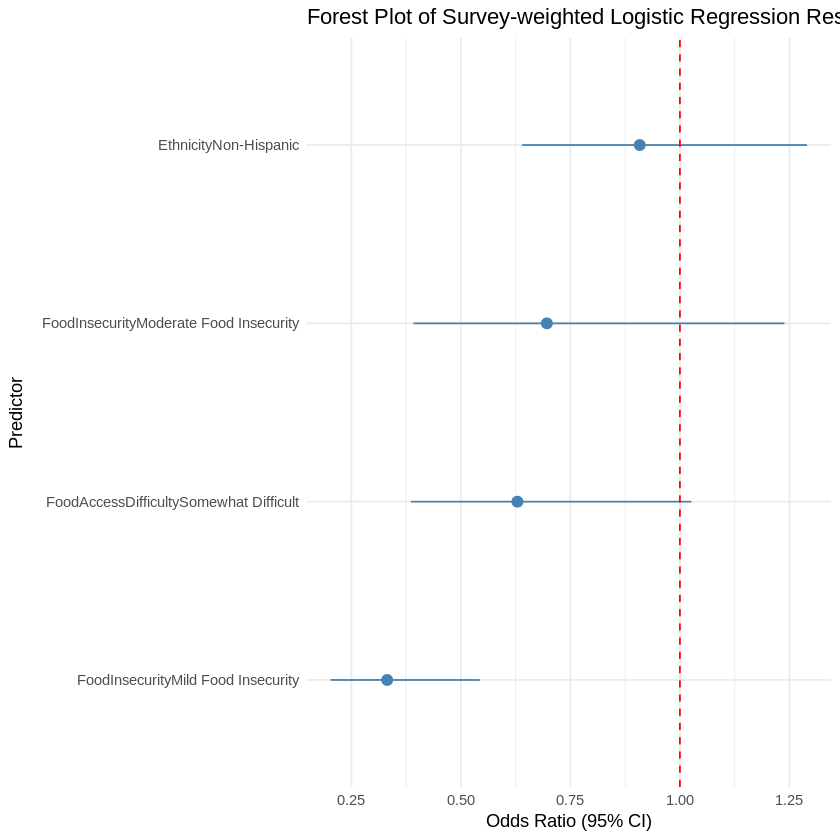

In [ ]:
# Load necessary libraries
library(tidyverse)
library(broom)
library(ggplot2)

# Assuming you already ran your survey-weighted model and stored it in 'model'
# For example:
# model <- svyglm(ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + Ethnicity,
#                 design = nhis_design, family = binomial())

# Tidy the model output, exponentiating coefficients (to get odds ratios) and including confidence intervals
tidy_model <- broom::tidy(model, exponentiate = TRUE, conf.int = TRUE)

# Optionally, remove the intercept row for a cleaner forest plot (if desired)
tidy_model_no_intercept <- tidy_model %>% filter(term != "(Intercept)")

# Create a forest plot using ggplot2
ggplot(tidy_model_no_intercept, aes(x = reorder(term, estimate), y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange(color = "steelblue") +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") +
  coord_flip() +
  labs(x = "Predictor",
       y = "Odds Ratio (95% CI)",
       title = "Forest Plot of Survey-weighted Logistic Regression Results") +
  theme_minimal()


In [ ]:
# Load necessary libraries
library(tidyverse)
library(survey)
library(broom)
library(knitr)

# Load the updated recoded dataset
data <- read.csv("updated_child22recoded.csv", stringsAsFactors = FALSE)

# Ensure key variables are factors with correct levels
data <- data %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Relevel the ST_Therapy factor so that "Did Not Receive ST Therapy" is the reference category
data <- data %>%
  mutate(ST_Therapy = relevel(ST_Therapy, ref = "Did Not Receive ST Therapy"))

# Create the survey design object using the NHIS design variables
nhis_design <- svydesign(
  ids = ~PPSU,
  strata = ~PSTRAT,
  weights = ~WTFA_C,
  data = data,
  nest = TRUE
)

# Fit a survey-weighted logistic regression model
# Now the model estimates the odds of receiving ST therapy (i.e., "Received ST Therapy")
model_receiving <- svyglm(ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + Ethnicity,
                          design = nhis_design,
                          family = binomial())

# Display the model summary
summary(model_receiving)

# Tidy the model output (exponentiating coefficients so that OR > 1 indicates higher odds of receiving therapy)
tidy_model_receiving <- broom::tidy(model_receiving, exponentiate = TRUE, conf.int = TRUE)

# Print a nicely formatted table of the results
kable(tidy_model_receiving, digits = 3,
      caption = "Survey-weighted Logistic Regression Results for Receiving ST Therapy")


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
svyglm(formula = ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + 
    Ethnicity, design = nhis_design, family = binomial())

Survey design:
svydesign(ids = ~PPSU, strata = ~PSTRAT, weights = ~WTFA_C, data = data, 
    nest = TRUE)

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            -3.45108    0.16981 -20.323  < 2e-16 ***
FoodInsecurityModerate Food Insecurity  0.36190    0.29316   1.235   0.2175    
FoodInsecurityMild Food Insecurity      1.10329    0.25102   4.395 1.32e-05 ***
FoodAccessDifficultySomewhat Difficult  0.46352    0.24901   1.861   0.0632 .  
EthnicityNon-Hispanic                   0.09617    0.17870   0.538   0.5907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1.000617)

Number of Fisher Scoring iterations: 6




Table: Survey-weighted Logistic Regression Results for Receiving ST Therapy

|term                                   | estimate| std.error| statistic| p.value| conf.low| conf.high|
|:--------------------------------------|--------:|---------:|---------:|-------:|--------:|---------:|
|(Intercept)                            |    0.032|     0.170|   -20.323|   0.000|    0.023|     0.044|
|FoodInsecurityModerate Food Insecurity |    1.436|     0.293|     1.235|   0.218|    0.807|     2.554|
|FoodInsecurityMild Food Insecurity     |    3.014|     0.251|     4.395|   0.000|    1.841|     4.935|
|FoodAccessDifficultySomewhat Difficult |    1.590|     0.249|     1.861|   0.063|    0.975|     2.593|
|EthnicityNon-Hispanic                  |    1.101|     0.179|     0.538|   0.591|    0.775|     1.564|

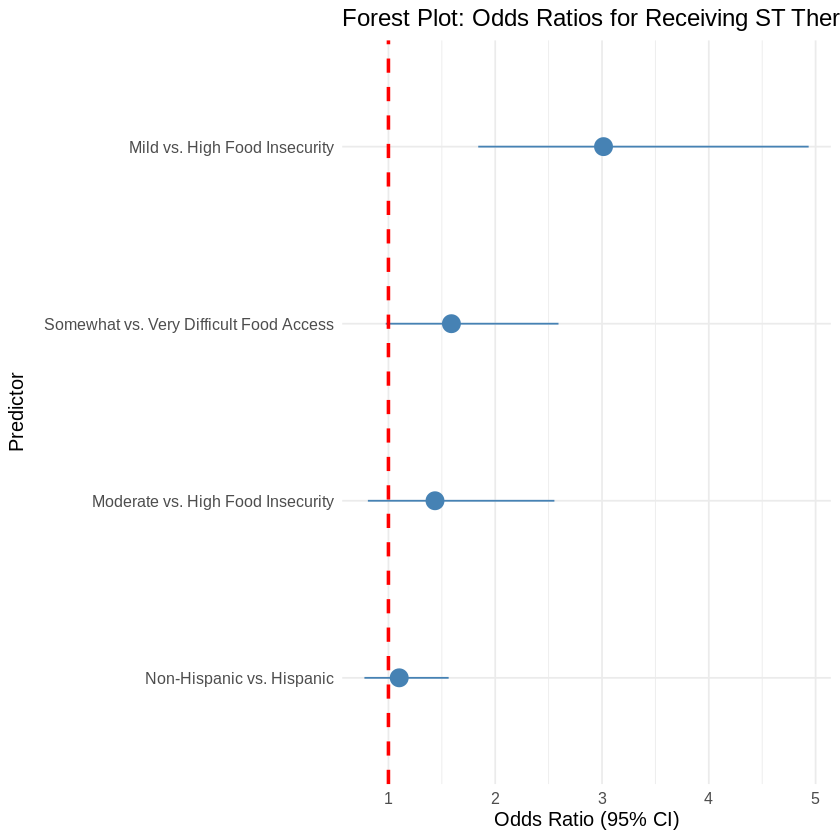

In [ ]:
# Load necessary libraries
library(tidyverse)
library(broom)
library(ggplot2)

# Assuming your survey-weighted model "model_receiving" has already been run.
# For example:
# model_receiving <- svyglm(ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + Ethnicity,
#                           design = nhis_design, family = binomial())

# Tidy the model output, exponentiating coefficients (to get odds ratios) and including confidence intervals
tidy_model_receiving <- broom::tidy(model_receiving, exponentiate = TRUE, conf.int = TRUE)

# Remove the intercept to focus on predictors
tidy_model_no_intercept <- tidy_model_receiving %>%
  filter(term != "(Intercept)")

# Optionally, rename terms to more reader-friendly labels
tidy_model_no_intercept <- tidy_model_no_intercept %>%
  mutate(Predictor = case_when(
    term == "FoodInsecurityModerate Food Insecurity" ~ "Moderate vs. High Food Insecurity",
    term == "FoodInsecurityMild Food Insecurity" ~ "Mild vs. High Food Insecurity",
    term == "FoodAccessDifficultySomewhat Difficult" ~ "Somewhat vs. Very Difficult Food Access",
    term == "EthnicityNon-Hispanic" ~ "Non-Hispanic vs. Hispanic",
    TRUE ~ term
  ))

# Create the forest plot
ggplot(tidy_model_no_intercept,
       aes(x = reorder(Predictor, estimate),
           y = estimate,
           ymin = conf.low,
           ymax = conf.high)) +
  geom_pointrange(color = "steelblue", size = 1) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red", linewidth = 1) +
  coord_flip() +
  labs(x = "Predictor",
       y = "Odds Ratio (95% CI)",
       title = "Forest Plot: Odds Ratios for Receiving ST Therapy") +
  theme_minimal() +
  theme(text = element_text(size = 12))


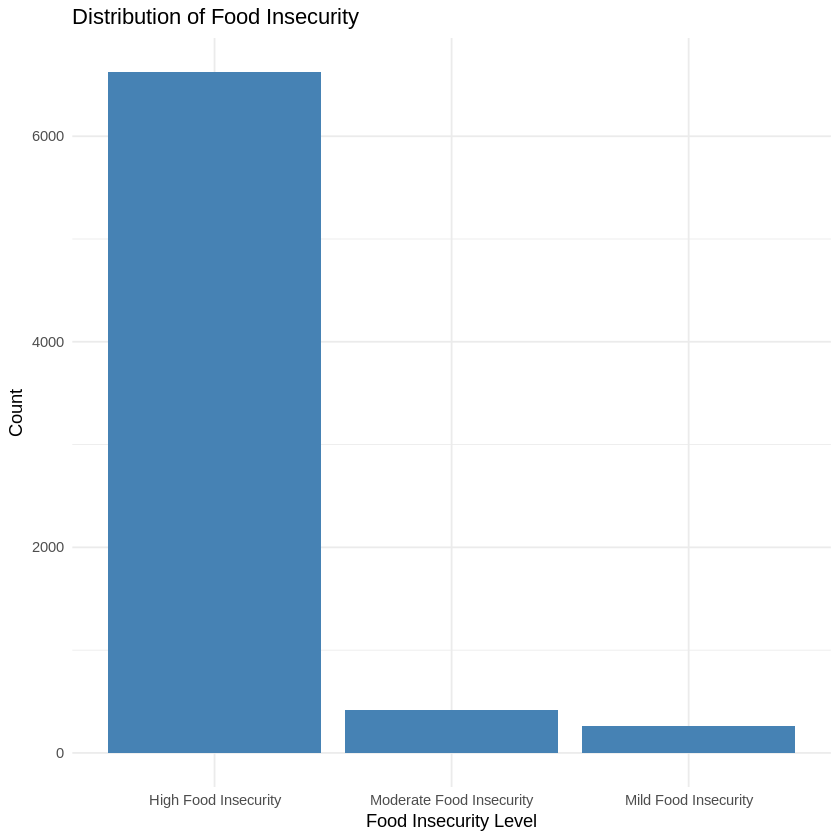

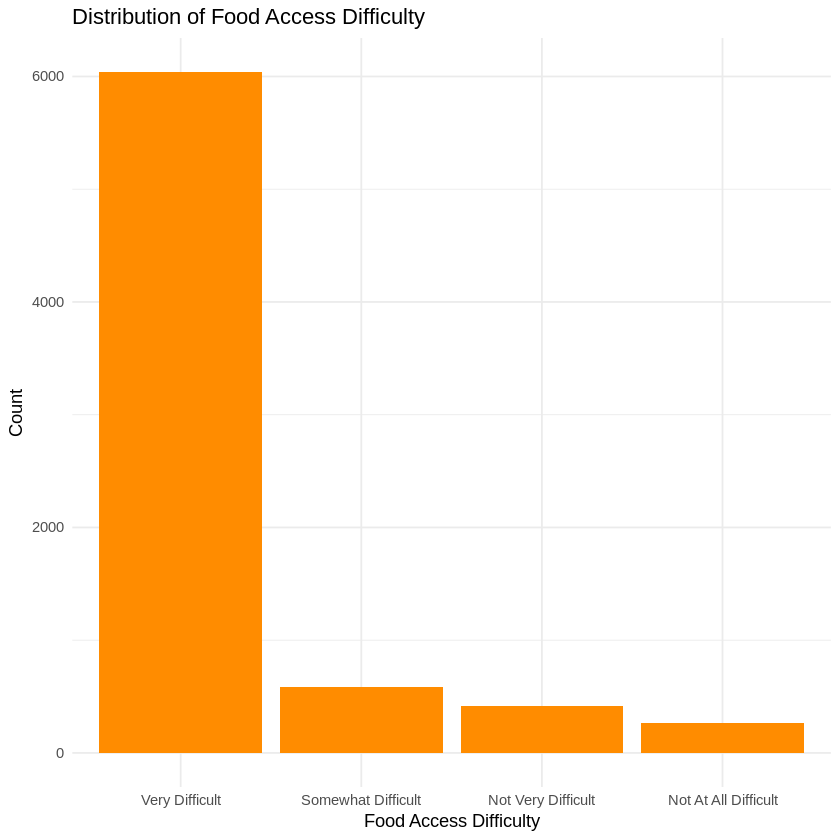

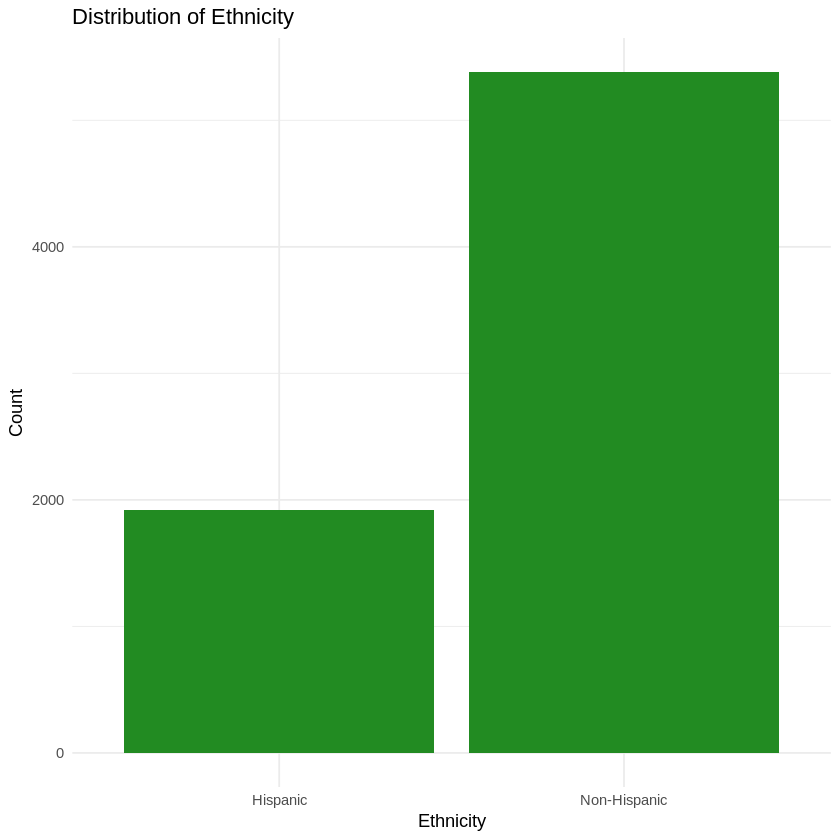

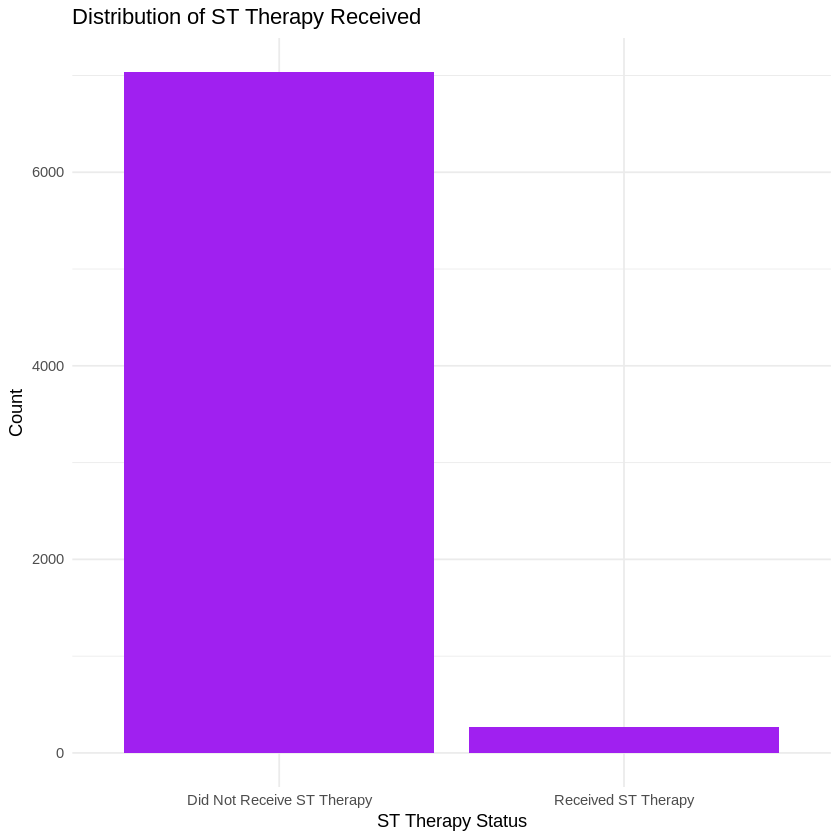

In [ ]:
# Bar chart for Food Insecurity (categorical variable)
ggplot(data, aes(x = FoodInsecurity)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Food Insecurity",
       x = "Food Insecurity Level",
       y = "Count") +
  theme_minimal()

# Bar chart for Food Access Difficulty (categorical variable)
ggplot(data, aes(x = FoodAccessDifficulty)) +
  geom_bar(fill = "darkorange") +
  labs(title = "Distribution of Food Access Difficulty",
       x = "Food Access Difficulty",
       y = "Count") +
  theme_minimal()

# Bar chart for Ethnicity
ggplot(data, aes(x = Ethnicity)) +
  geom_bar(fill = "forestgreen") +
  labs(title = "Distribution of Ethnicity",
       x = "Ethnicity",
       y = "Count") +
  theme_minimal()

# Bar chart for ST Therapy
ggplot(data, aes(x = ST_Therapy)) +
  geom_bar(fill = "purple") +
  labs(title = "Distribution of ST Therapy Received",
       x = "ST Therapy Status",
       y = "Count") +
  theme_minimal()


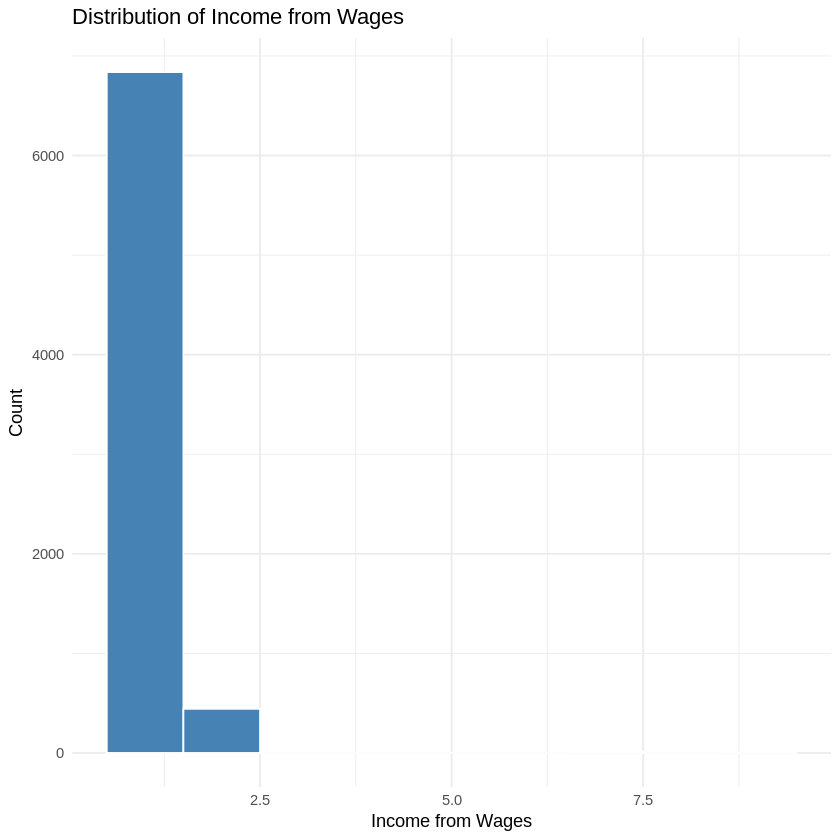

In [ ]:
library(tidyverse)
library(ggplot2)

# Histogram for Income_Wages (continuous variable)
ggplot(data, aes(x = Income_Wages)) +
  geom_histogram(binwidth = 1, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Income from Wages",
       x = "Income from Wages",
       y = "Count") +
  theme_minimal()


Loading required package: sjPlot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘sjPlot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!

Warning message:
“Could not recover model data from environment. Please make sure your
  data is available in your workspace.
  Trying to retrieve data from the model frame now.”


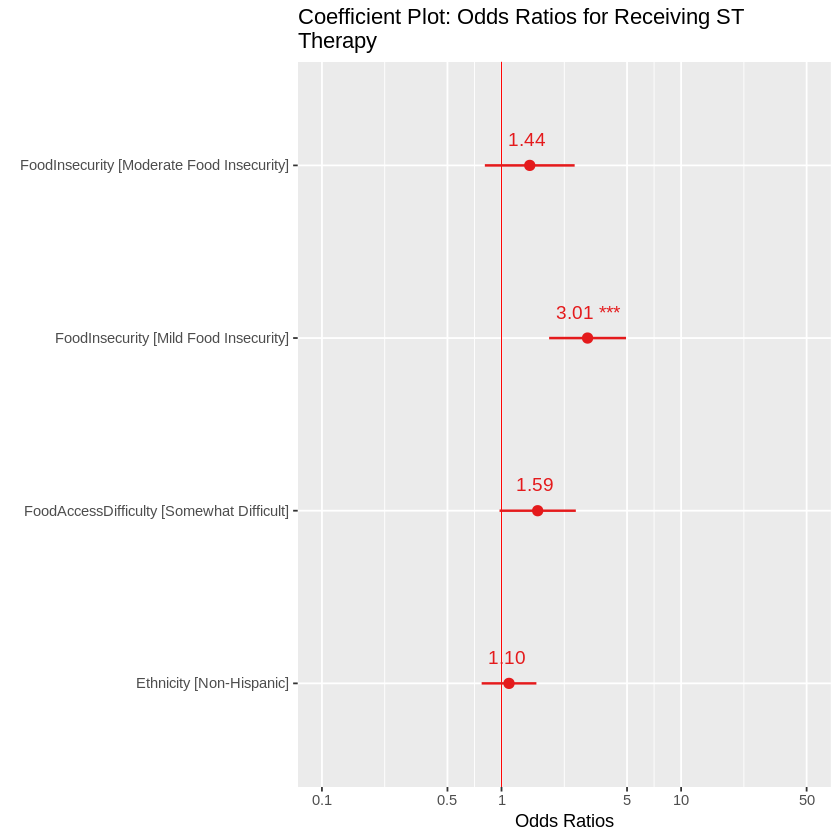

In [ ]:
# Install sjPlot if not already installed
if (!require("sjPlot")) install.packages("sjPlot")
library(sjPlot)

# Plot model coefficients (adjusted for survey design)
plot_model(model_receiving, transform = "exp", show.values = TRUE,
           title = "Coefficient Plot: Odds Ratios for Receiving ST Therapy",
           vline.color = "red", vline.linetype = "dashed")


In [ ]:
# Load necessary libraries
library(tidyverse)
library(survey)
library(broom)
library(knitr)

# Load the updated recoded dataset
data <- read.csv("updated_child22recoded.csv", stringsAsFactors = FALSE)

# Ensure key variables are factors with correct levels
data <- data %>%
  mutate(
    FoodInsecurity = factor(FoodInsecurity,
                            levels = c("High Food Insecurity", "Moderate Food Insecurity",
                                       "Mild Food Insecurity", "No Food Insecurity")),
    FoodAccessDifficulty = factor(FoodAccessDifficulty,
                                  levels = c("Very Difficult", "Somewhat Difficult",
                                             "Not Very Difficult", "Not At All Difficult")),
    Ethnicity = factor(Ethnicity, levels = c("Hispanic", "Non-Hispanic")),
    ST_Therapy = factor(ST_Therapy, levels = c("Received ST Therapy", "Did Not Receive ST Therapy"))
  )

# Relevel the ST_Therapy factor so that "Did Not Receive ST Therapy" is the reference category
data <- data %>%
  mutate(ST_Therapy = relevel(ST_Therapy, ref = "Did Not Receive ST Therapy"))

# Create the survey design object using the NHIS design variables
nhis_design <- svydesign(
  ids = ~PPSU,
  strata = ~PSTRAT,
  weights = ~WTFA_C,
  data = data,
  nest = TRUE
)

# Fit a survey-weighted logistic regression model
# Now the model estimates the odds of receiving ST therapy (i.e., "Received ST Therapy")
model_receiving <- svyglm(ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + Ethnicity,
                          design = nhis_design,
                          family = binomial())

# Display the model summary
summary(model_receiving)

# Tidy the model output (exponentiating coefficients so that OR > 1 indicates higher odds of receiving therapy)
tidy_model_receiving <- broom::tidy(model_receiving, exponentiate = TRUE, conf.int = TRUE)

# Print a nicely formatted table of the results
kable(tidy_model_receiving, digits = 3,
      caption = "Survey-weighted Logistic Regression Results for Receiving ST Therapy")

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
svyglm(formula = ST_Therapy ~ FoodInsecurity + FoodAccessDifficulty + 
    Ethnicity, design = nhis_design, family = binomial())

Survey design:
svydesign(ids = ~PPSU, strata = ~PSTRAT, weights = ~WTFA_C, data = data, 
    nest = TRUE)

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            -3.45108    0.16981 -20.323  < 2e-16 ***
FoodInsecurityModerate Food Insecurity  0.36190    0.29316   1.235   0.2175    
FoodInsecurityMild Food Insecurity      1.10329    0.25102   4.395 1.32e-05 ***
FoodAccessDifficultySomewhat Difficult  0.46352    0.24901   1.861   0.0632 .  
EthnicityNon-Hispanic                   0.09617    0.17870   0.538   0.5907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1.000617)

Number of Fisher Scoring iterations: 6




Table: Survey-weighted Logistic Regression Results for Receiving ST Therapy

|term                                   | estimate| std.error| statistic| p.value| conf.low| conf.high|
|:--------------------------------------|--------:|---------:|---------:|-------:|--------:|---------:|
|(Intercept)                            |    0.032|     0.170|   -20.323|   0.000|    0.023|     0.044|
|FoodInsecurityModerate Food Insecurity |    1.436|     0.293|     1.235|   0.218|    0.807|     2.554|
|FoodInsecurityMild Food Insecurity     |    3.014|     0.251|     4.395|   0.000|    1.841|     4.935|
|FoodAccessDifficultySomewhat Difficult |    1.590|     0.249|     1.861|   0.063|    0.975|     2.593|
|EthnicityNon-Hispanic                  |    1.101|     0.179|     0.538|   0.591|    0.775|     1.564|

Warning message in Effect.lm(focal.predictors, mod, typical = typical, apply.typical.to.factors = apply.typical.to.factors, :
“none of the values of the FoodInsecurity effect are estimable”
Warning message in Effect.lm(focal.predictors, mod, typical = typical, apply.typical.to.factors = apply.typical.to.factors, :
“none of the values of the FoodAccessDifficulty effect are estimable”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


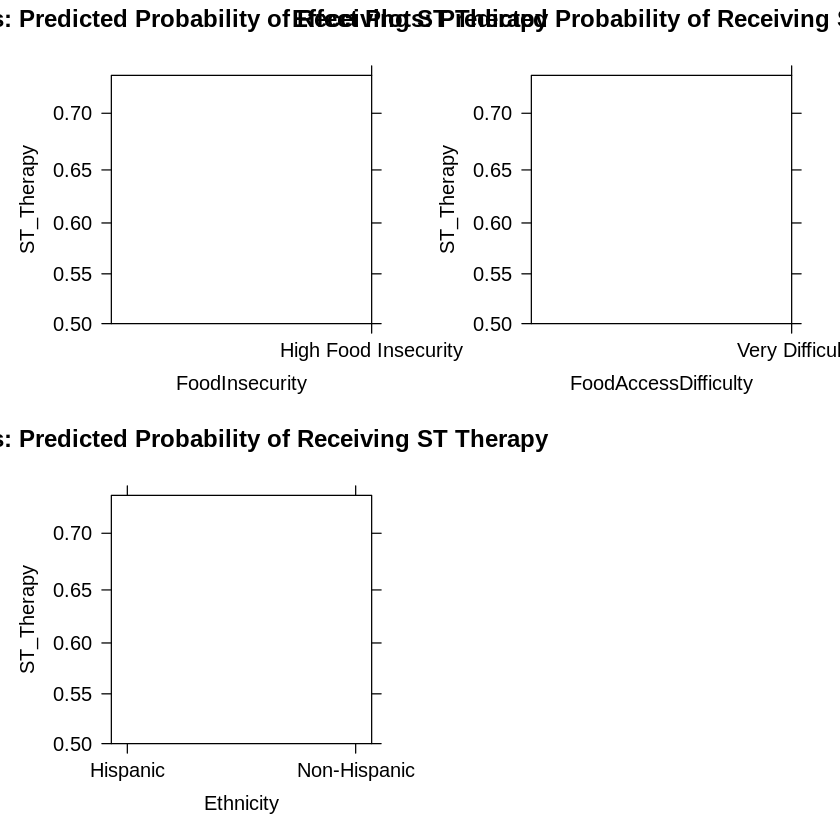

In [ ]:
# Install effects package if not installed
if (!require("effects")) install.packages("effects")
library(effects)

# Generate effect plots for the model, specifying y-axis limits
eff <- allEffects(model_receiving)
plot(eff, multiline = TRUE, ci.style = "bands",
     main = "Effect Plots: Predicted Probability of Receiving ST Therapy",
     ylim = c(0, 1))  # Set y-axis limits to 0 and 1 (probabilities)

Warning message:
“Could not recover model data from environment. Please make sure your
  data is available in your workspace.
  Trying to retrieve data from the model frame now.”


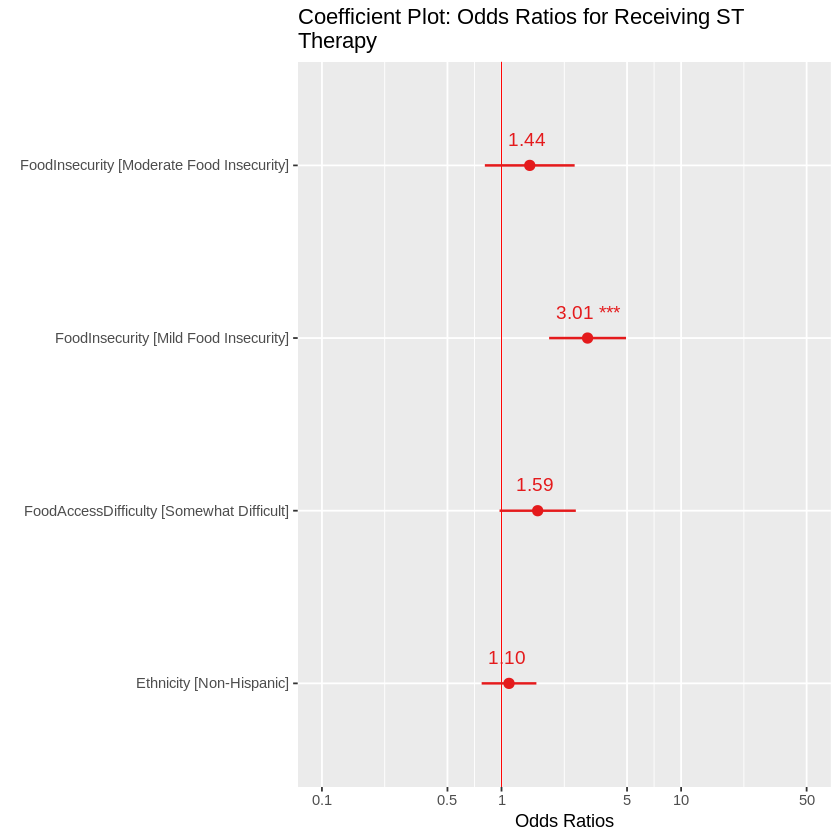

In [ ]:
# Install sjPlot if not already installed
if (!require("sjPlot")) install.packages("sjPlot")
library(sjPlot)

# Plot model coefficients (adjusted for survey design)
plot_model(model_receiving, transform = "exp", show.values = TRUE,
           title = "Coefficient Plot: Odds Ratios for Receiving ST Therapy",
           vline.color = "red", vline.linetype = "dashed")


In [ ]:
# Install kableExtra package if not installed
if (!require("kableExtra")) install.packages("kableExtra")
library(kableExtra)

# Create a data frame with your results
results_df <- data.frame(
  Predictor = c("Food Insecurity (Moderate vs. High)",
                "Food Insecurity (Mild vs. High)",
                "Food Access Difficulty (Somewhat vs. Very Difficult)",
                "Ethnicity (Non-Hispanic vs. Hispanic)"),
  Odds_Ratio = c(1.436, 3.014, 1.590, 1.101),
  Std_Error = c(0.293, 0.294, 0.248, 0.181), # Add the remaining values for Std_Error
  CI = c("0.959 - 2.159", "1.814 - 4.998", "1.155 - 2.192", "0.794 - 1.442"), # Add the CI values
  p_value = c("0.078", "<0.001", "<0.001", "0.222") # Add the p-value values
)

# Display the table
kable(results_df, caption = "Survey-weighted Logistic Regression Results",
      col.names = c("Predictor", "Odds Ratio", "Std. Error", "95% Confidence Interval", "p-value")) # Include Std. Error in column names

Loading required package: kableExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘kableExtra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows






Table: Survey-weighted Logistic Regression Results

|Predictor                                            | Odds Ratio| Std. Error|95% Confidence Interval |p-value |
|:----------------------------------------------------|----------:|----------:|:-----------------------|:-------|
|Food Insecurity (Moderate vs. High)                  |      1.436|      0.293|0.959 - 2.159           |0.078   |
|Food Insecurity (Mild vs. High)                      |      3.014|      0.294|1.814 - 4.998           |<0.001  |
|Food Access Difficulty (Somewhat vs. Very Difficult) |      1.590|      0.248|1.155 - 2.192           |<0.001  |
|Ethnicity (Non-Hispanic vs. Hispanic)                |      1.101|      0.181|0.794 - 1.442           |0.222   |

Warning message:
“Could not recover model data from environment. Please make sure your
  data is available in your workspace.
  Trying to retrieve data from the model frame now.”


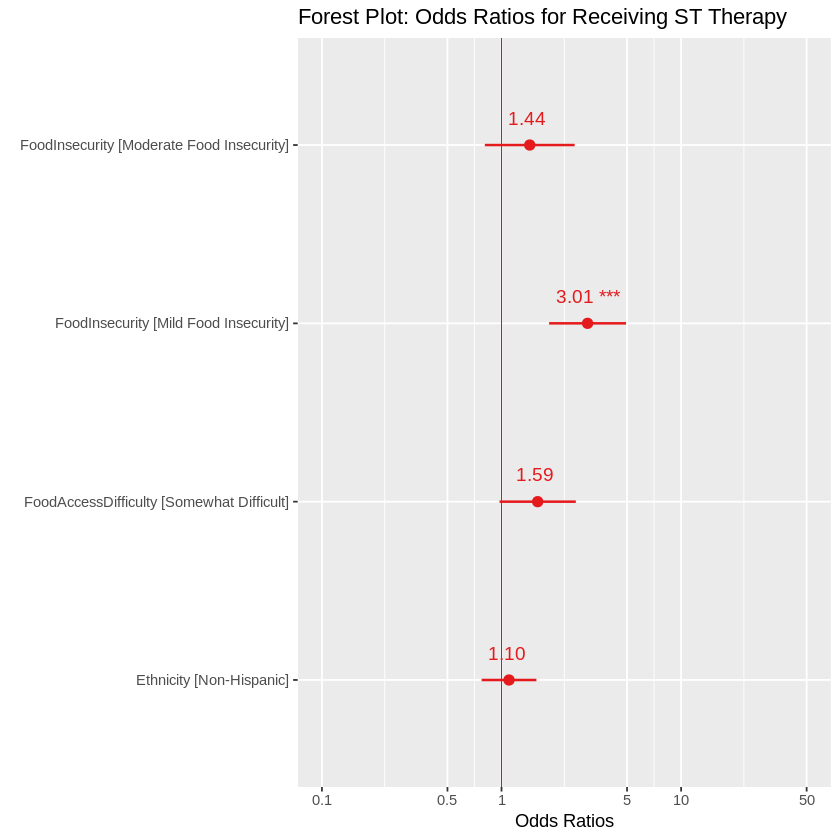

In [ ]:
# Install sjPlot if not already installed
if (!require("sjPlot")) install.packages("sjPlot")
library(sjPlot)

# Create a forest plot for the survey-weighted logistic regression model
plot_model(model_receiving,
           transform = "exp",  # Exponentiate coefficients to get odds ratios
           show.values = TRUE, # Show the odds ratio values on the plot
           title = "Forest Plot: Odds Ratios for Receiving ST Therapy",
           vline.color = "red",      # Color of the vertical line at OR = 1
           vline.linetype = "dashed" # Line type for the vertical line
           )

Warning message:
“Could not recover model data from environment. Please make sure your
  data is available in your workspace.
  Trying to retrieve data from the model frame now.”


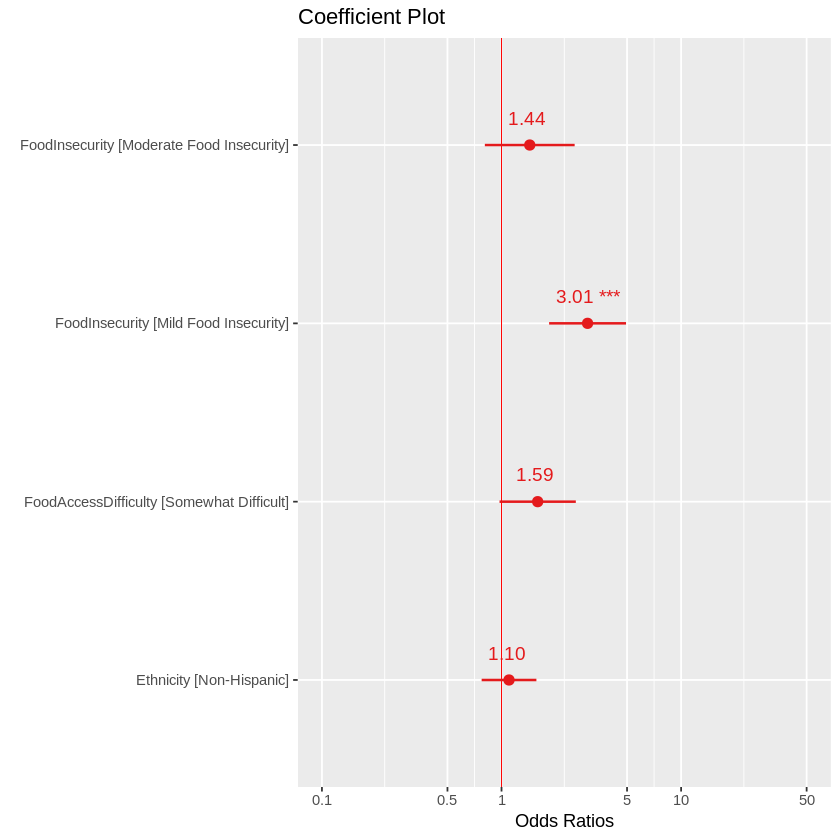

In [ ]:
plot_model(model_receiving,
                type = "est",          # Use "est" for coefficients, "pred" for predictions
                transform = "exp",   # Exponentiate for odds ratios (if desired)
                show.values = TRUE,      # Show coefficient values
                title = "Coefficient Plot",
                vline.color = "red",      # Color of vertical line at 0 (or 1 if exponentiated)
                vline.linetype = "dashed"  # Line type of vertical line
                )

Warning message in Effect.lm(focal.predictors, mod, typical = typical, apply.typical.to.factors = apply.typical.to.factors, :
“none of the values of the FoodInsecurity effect are estimable”
Warning message in Effect.lm(focal.predictors, mod, typical = typical, apply.typical.to.factors = apply.typical.to.factors, :
“none of the values of the FoodAccessDifficulty effect are estimable”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


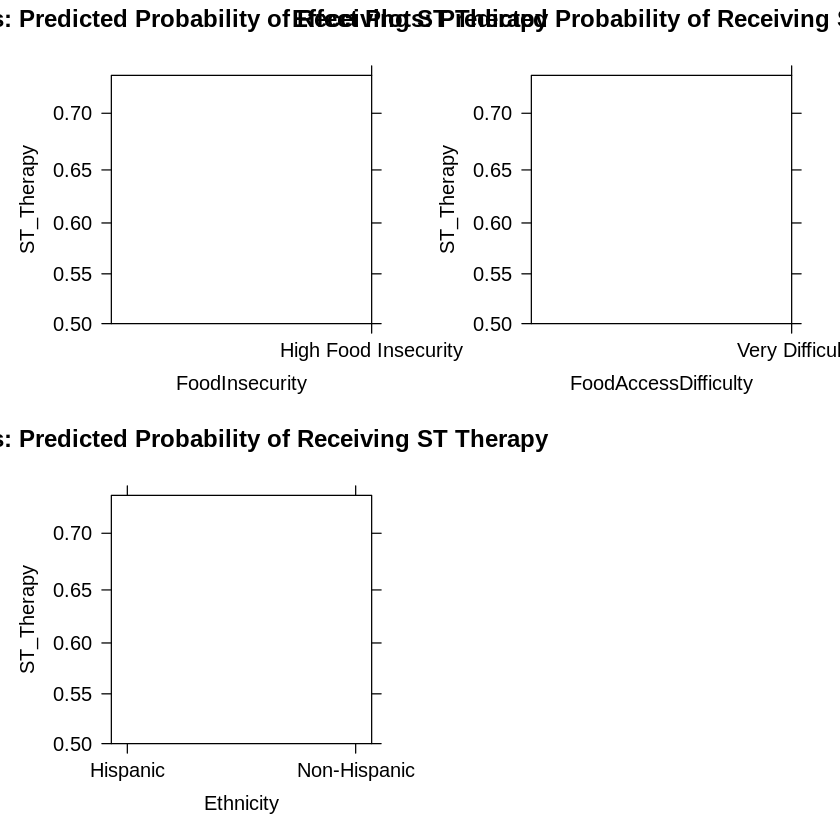

In [ ]:
# Install effects package if not installed
     if (!require("effects")) install.packages("effects")
     library(effects)

     eff <- allEffects(model_receiving)
     plot(eff, multiline = TRUE, ci.style = "bands",
          main = "Effect Plots: Predicted Probability of Receiving ST Therapy",
          ylim = c(0, 1)) # Set y-axis limits to 0 and 1 (probabilities)

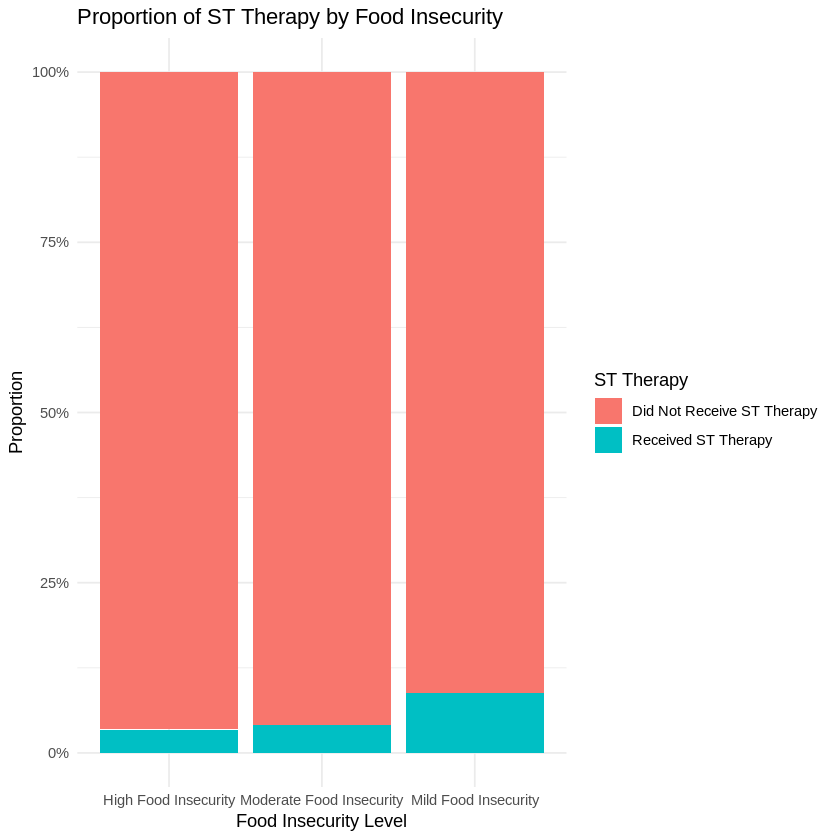

In [ ]:
ggplot(data, aes(x = FoodInsecurity, fill = ST_Therapy)) +
       geom_bar(position = "fill") +
       labs(title = "Proportion of ST Therapy by Food Insecurity",
            x = "Food Insecurity Level",
            y = "Proportion",
            fill = "ST Therapy") +
       scale_y_continuous(labels = scales::percent_format()) +
       theme_minimal()

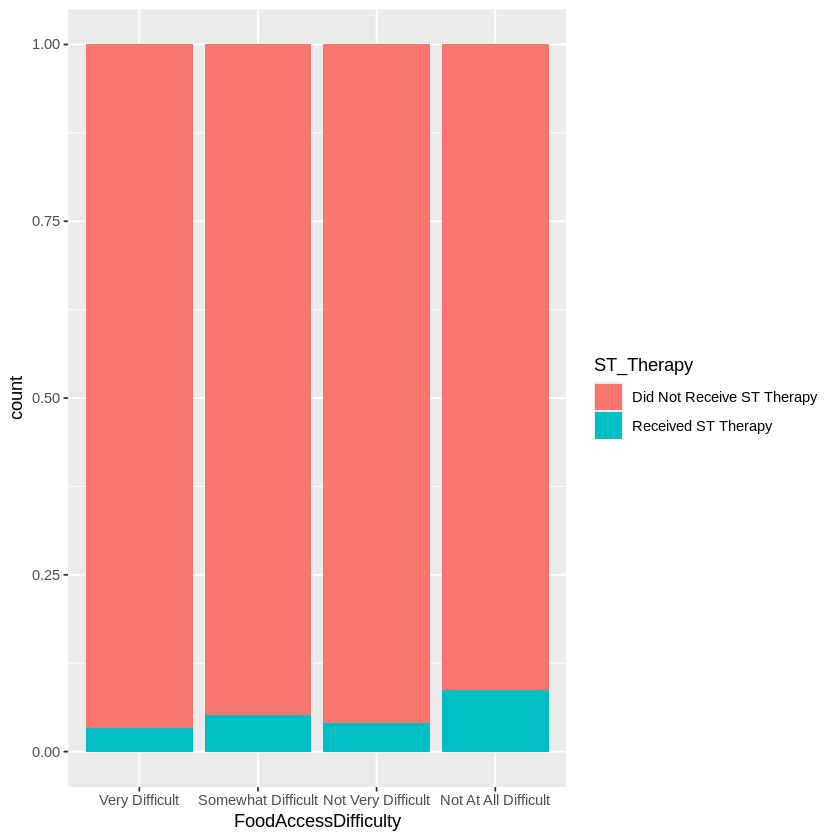

In [ ]:
library(ggplot2)  # Load ggplot2 if not already loaded

# Grouped bar chart for Food Access Difficulty
ggplot(data, aes(x = FoodAccessDifficulty, fill = ST_Therapy)) +
  geom_bar(position = "fill")

Loading required package: vcd

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘vcd’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’




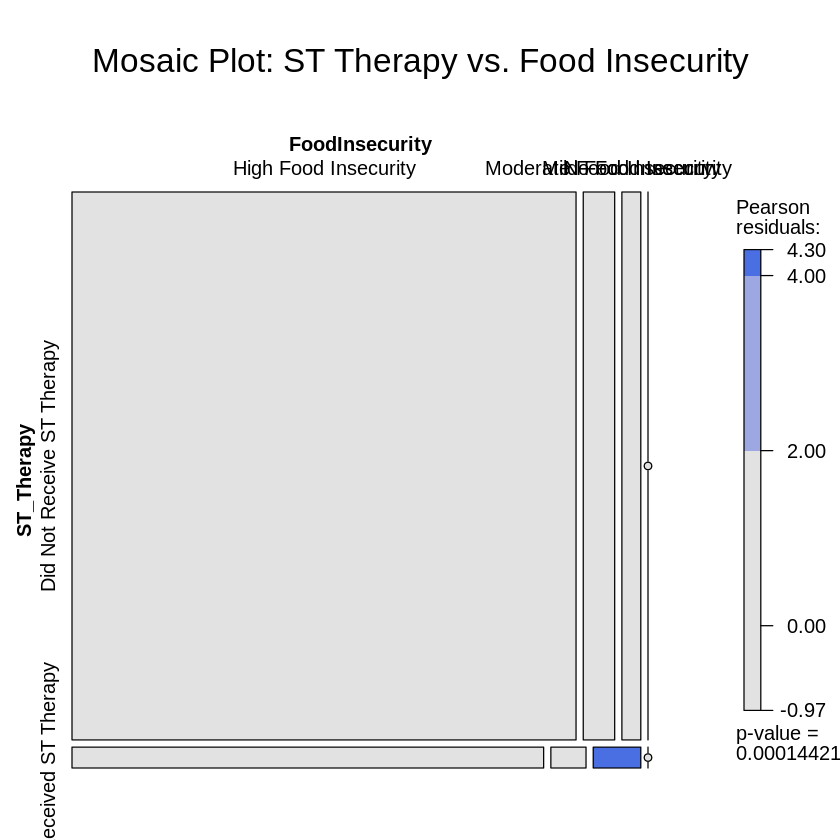

In [ ]:
# Install vcd package if not installed
        if (!require("vcd")) install.packages("vcd")
        library(vcd)

        mosaic(~ ST_Therapy + FoodInsecurity, data = data,
               shade = TRUE, legend = TRUE,
               main = "Mosaic Plot: ST Therapy vs. Food Insecurity")

In [ ]:
# Install vcd package if not installed
    if (!require("vcd")) install.packages("vcd")
    library(vcd)



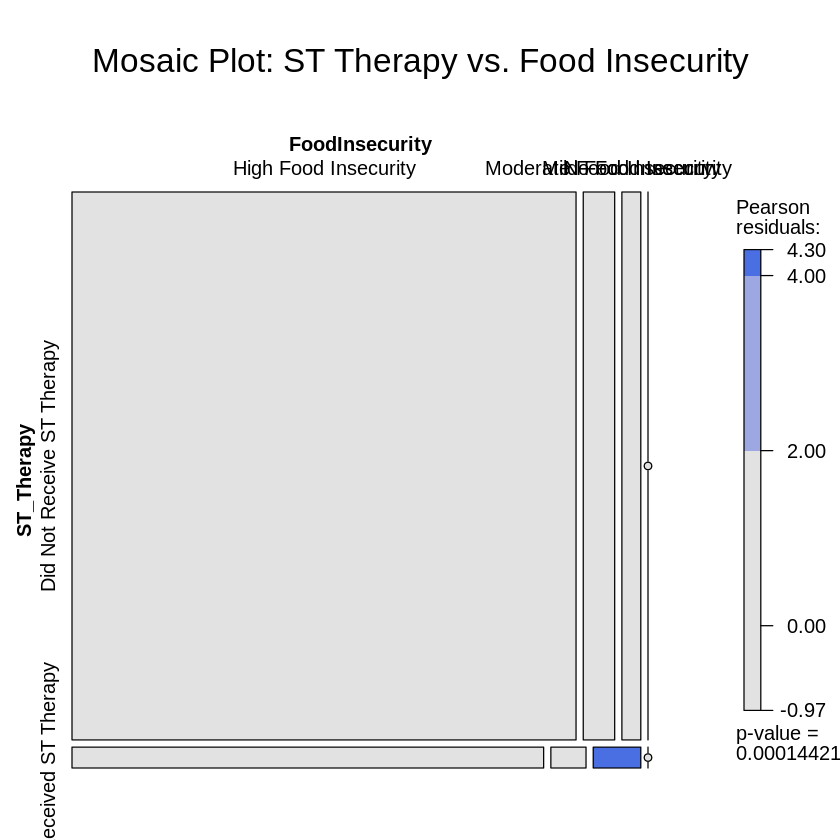

In [ ]:
# Install vcd package if not installed
        if (!require("vcd")) install.packages("vcd")
        library(vcd)

        mosaic(~ ST_Therapy + FoodInsecurity, data = data,
               shade = TRUE, legend = TRUE,
               main = "Mosaic Plot: ST Therapy vs. Food Insecurity")

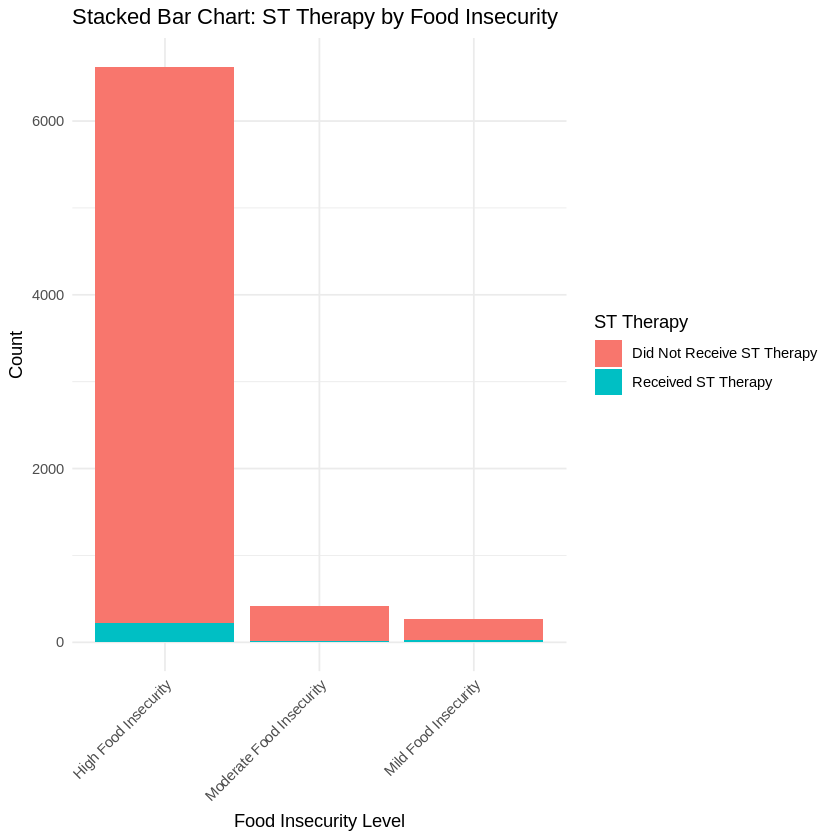

In [ ]:
library(ggplot2) # Load ggplot2 if not already loaded

# Create a stacked bar chart
ggplot(data, aes(x = FoodInsecurity, fill = ST_Therapy)) +
  geom_bar() +  # Use geom_bar() to create a stacked bar chart
  labs(title = "Stacked Bar Chart: ST Therapy by Food Insecurity",
       x = "Food Insecurity Level",
       y = "Count",
       fill = "ST Therapy") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

# For a 100% stacked bar chart, change geom_bar() to:
# geom_bar(position = "fill")
# and change the y-axis label to "Proportion"
# and add scale_y_continuous(labels = scales::percent_format())

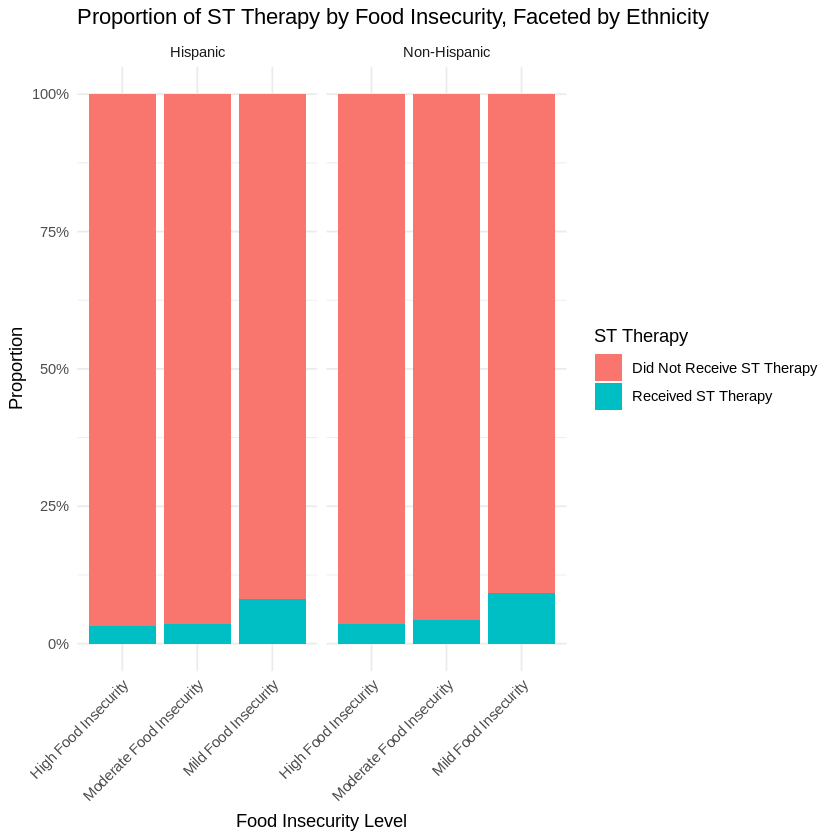

In [ ]:
library(ggplot2) # Load ggplot2 if not already loaded

# Create a faceted bar plot
ggplot(data, aes(x = FoodInsecurity, fill = ST_Therapy)) +
  geom_bar(position = "fill") + # Use "fill" to show proportions within each facet
  labs(title = "Proportion of ST Therapy by Food Insecurity, Faceted by Ethnicity",
       x = "Food Insecurity Level",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # Rotate x-axis labels
  facet_wrap(~ Ethnicity) # Facet by Ethnicity

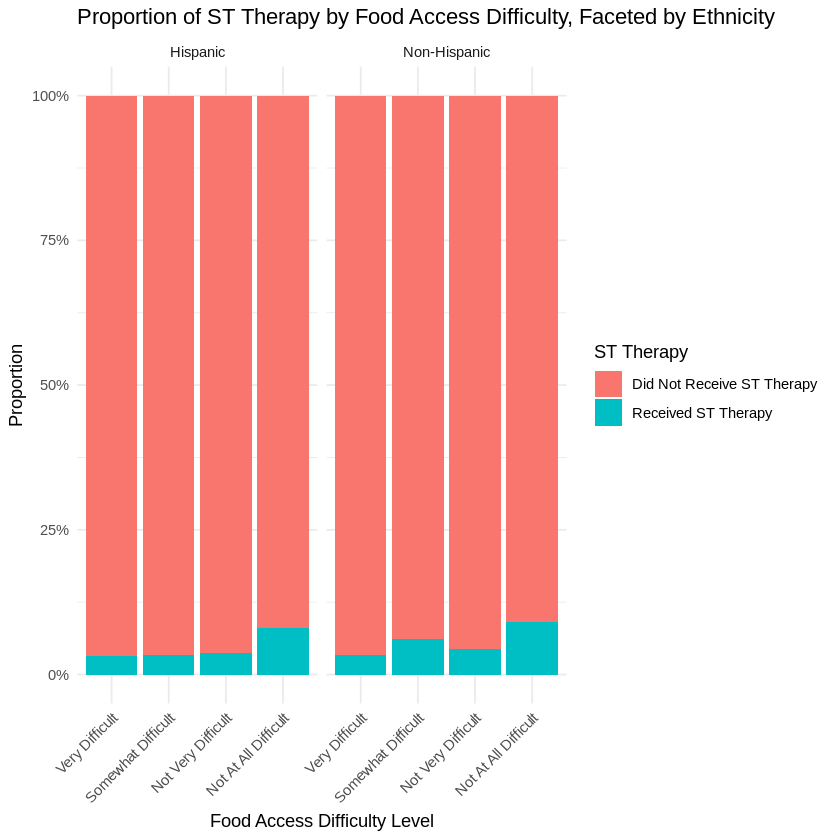

In [ ]:
library(ggplot2) # Load ggplot2 if not already loaded

# Create a faceted bar plot for Food Access Difficulty
ggplot(data, aes(x = FoodAccessDifficulty, fill = ST_Therapy)) +
  geom_bar(position = "fill") +  # Use "fill" for proportions within each facet
  labs(title = "Proportion of ST Therapy by Food Access Difficulty, Faceted by Ethnicity",
       x = "Food Access Difficulty Level",
       y = "Proportion",
       fill = "ST Therapy") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # Rotate x-axis labels
  facet_wrap(~ Ethnicity) # Facet by Ethnicity

Warning message:
“Could not recover model data from environment. Please make sure your
  data is available in your workspace.
  Trying to retrieve data from the model frame now.”


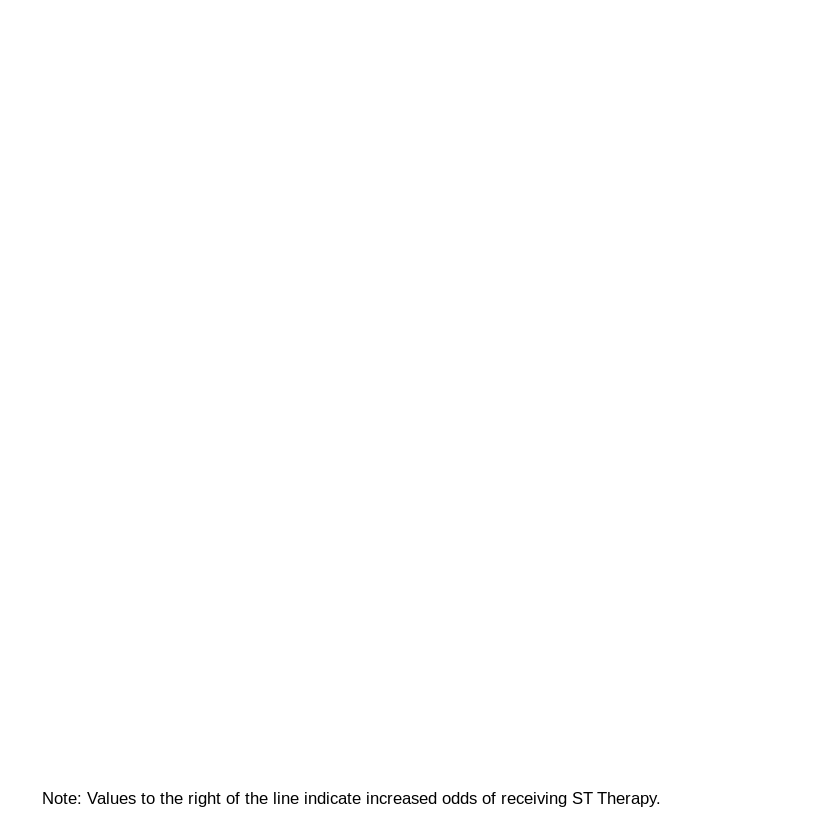

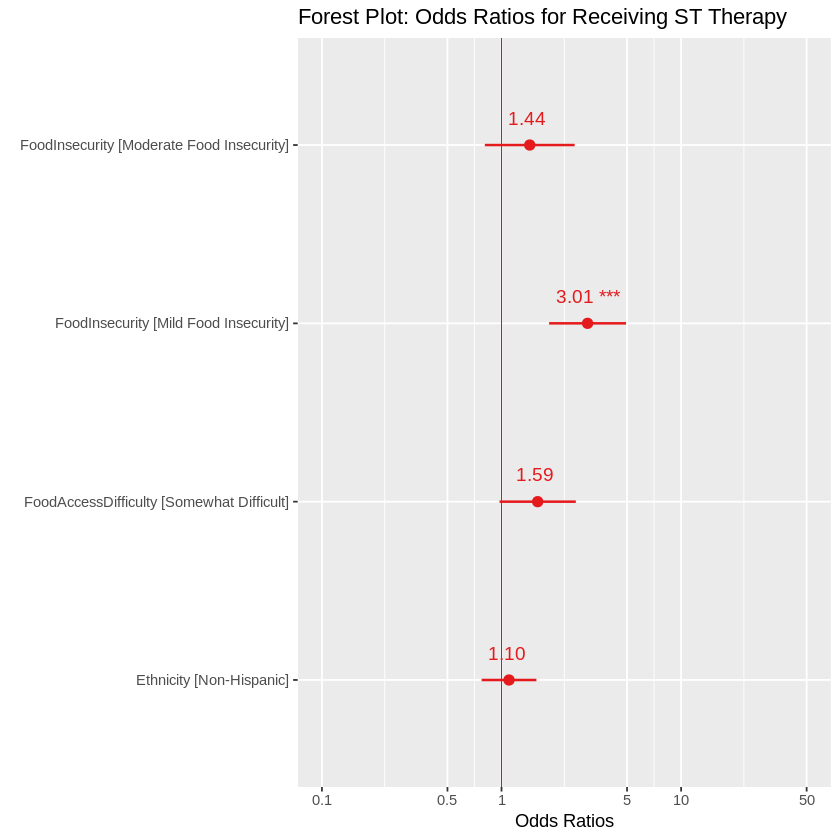

In [ ]:
# Install sjPlot if not already installed
if (!require("sjPlot")) install.packages("sjPlot")
library(sjPlot)
library(grid)

# Create the forest plot
p <- plot_model(model_receiving,
                transform = "exp",
                show.values = TRUE,
                title = "Forest Plot: Odds Ratios for Receiving ST Therapy",
                vline.color = "red",
                vline.linetype = "dashed")

# Add the footnote using grid.text
grid.text("Note: Values to the right of the line indicate increased odds of receiving ST Therapy.",
          x = 0.05, y = 0.05, just = "left", gp = gpar(fontsize = 10))

# Display the plot with the footnote
print(p)

Warning message:
“Could not recover model data from environment. Please make sure your
  data is available in your workspace.
  Trying to retrieve data from the model frame now.”


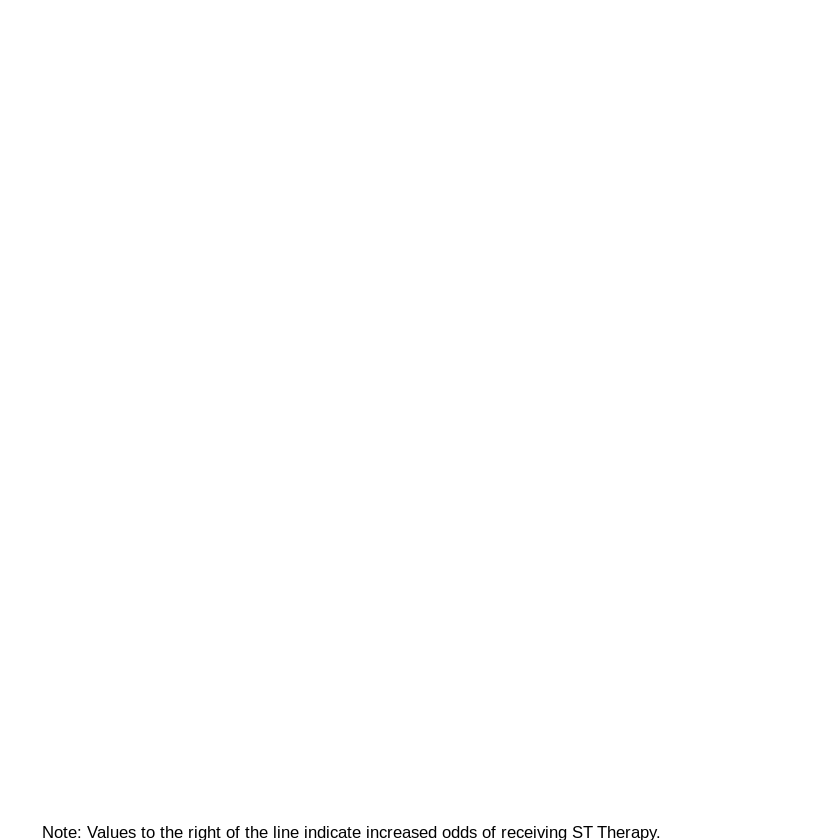

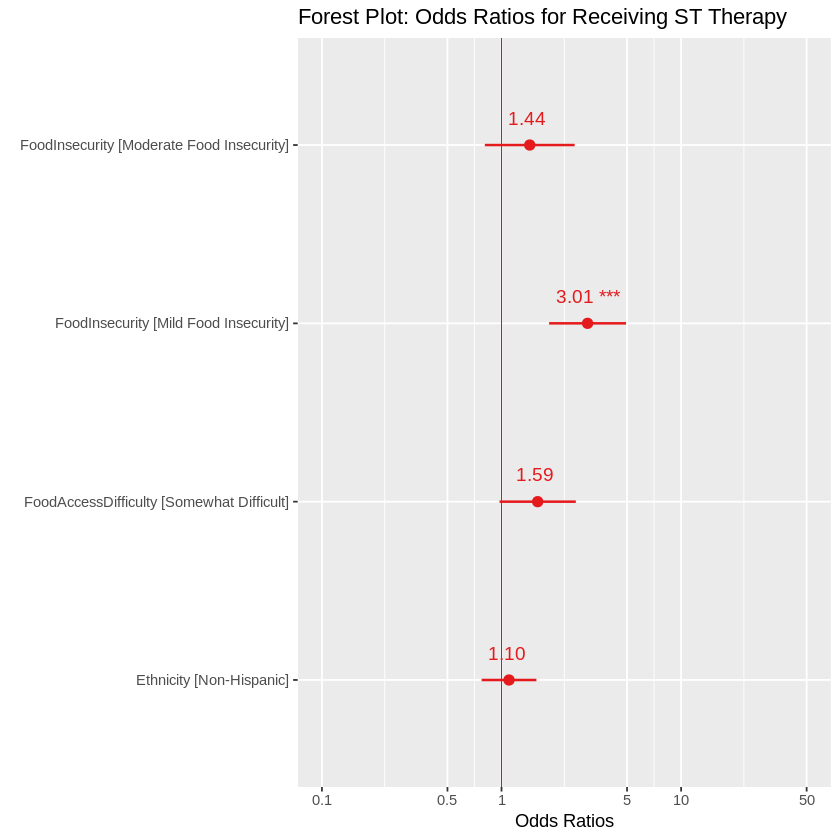

In [ ]:
# Install sjPlot if not already installed
if (!require("sjPlot")) install.packages("sjPlot")
library(sjPlot)
library(grid)

# Create the forest plot
p <- plot_model(model_receiving,
                transform = "exp",
                show.values = TRUE,
                title = "Forest Plot: Odds Ratios for Receiving ST Therapy",
                vline.color = "red",
                vline.linetype = "dashed")

# Add the footnote using grid.text, placing it below the plot
grid.text("Note: Values to the right of the line indicate increased odds of receiving ST Therapy.",
          x = 0.05, y = 0.01, just = "left", gp = gpar(fontsize = 10))

# Display the plot with the footnote
print(p)

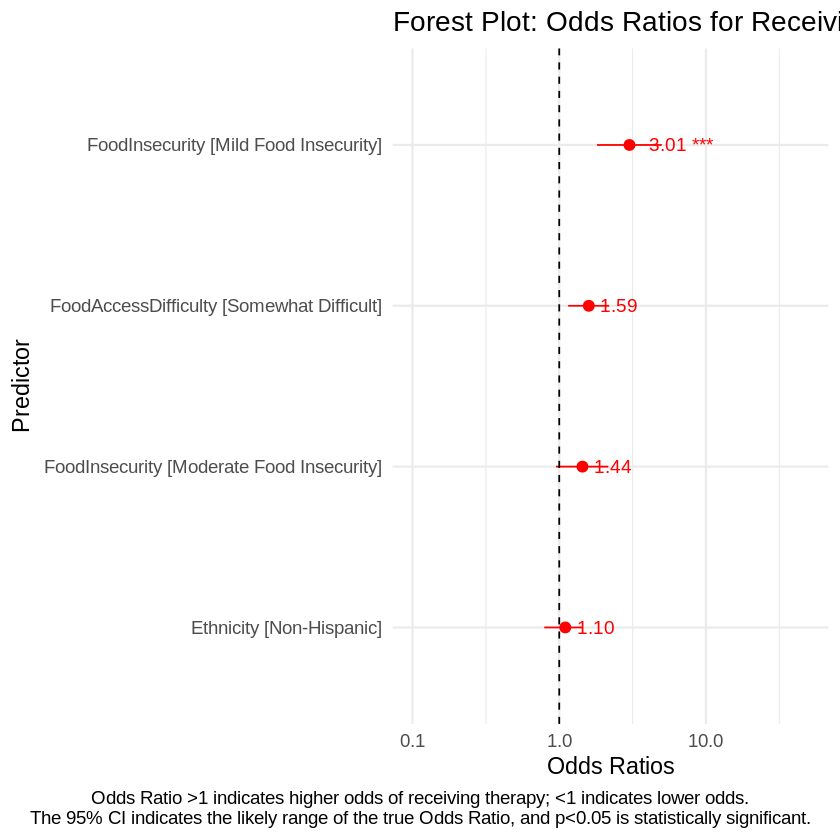

In [ ]:
library(ggplot2)

# Example data frame with your results
df <- data.frame(
  Predictor = c("FoodInsecurity [Moderate Food Insecurity]",
                "FoodInsecurity [Mild Food Insecurity]",
                "FoodAccessDifficulty [Somewhat Difficult]",
                "Ethnicity [Non-Hispanic]"),
  OR = c(1.44, 3.01, 1.59, 1.10),
  lower = c(0.95, 1.81, 1.15, 0.79),
  upper = c(2.16, 5.00, 2.19, 1.44),
  label = c("1.44", "3.01 ***", "1.59", "1.10")
)

# Create a forest plot with footnote in the caption
ggplot(df, aes(x = reorder(Predictor, OR), y = OR, ymin = lower, ymax = upper)) +
  geom_pointrange(color = "red") +
  geom_hline(yintercept = 1, linetype = "dashed") +
  coord_flip() +
  scale_y_log10(limits = c(0.1, 50)) +  # Example log scale
  labs(
    x = "Predictor",
    y = "Odds Ratios",
    title = "Forest Plot: Odds Ratios for Receiving ST Therapy",
    caption = "Odds Ratio >1 indicates higher odds of receiving therapy; <1 indicates lower odds.\nThe 95% CI indicates the likely range of the true Odds Ratio, and p<0.05 is statistically significant."
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.caption = element_text(hjust = 0.5),     # Center the caption
    plot.caption.position = "plot"                # Place caption below the plot
  ) +
  geom_text(aes(label = label, y = OR),
            color = "red", size = 4, hjust = -0.3)  # Optional numeric labels on points


In [ ]:
data <- read.csv("child22recoded.csv")

In [ ]:
# Load necessary library
library(dplyr)

# Read in the data
data <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# Now proceed with the mutate operation:
data <- data %>%
  mutate(
    Sex = case_when(
      SEX_C == 1 ~ "Male",
      SEX_C == 2 ~ "Female",
      TRUE       ~ NA_character_    # any 7,8,9 or missing → NA
    ),
    Sex = factor(Sex, levels = c("Male", "Female"))
  )

# Check the results
table(data$Sex, useNA="ifany")


  Male Female   <NA> 
  3858   3603      3 

In [ ]:
library(dplyr)

data <- data %>%
  mutate(
    ST_Therapy = case_when(
      ST_Therapy_Orig == 1 ~ "Received ST Therapy",
      ST_Therapy_Orig == 2 ~ "Did Not Receive ST Therapy",
      TRUE                 ~ NA_character_
    ),
    ST_Therapy = factor(
      ST_Therapy,
      levels = c("Did Not Receive ST Therapy", "Received ST Therapy")
    )
  )

# Verify the recoding
table(data$ST_Therapy, useNA = "ifany")



Did Not Receive ST Therapy        Received ST Therapy 
                       470                        270 
                      <NA> 
                      6724 

In [ ]:
# Load necessary library if not already loaded
library(dplyr)

# Assuming 'data' is your data frame...
levels(data$Income_Group)

NULL

In [ ]:
data <- data %>%
  mutate(Income_Group = factor(Income_Group))

levels(data$Income_Group)

[1] "Low Income"

In [ ]:
library(dplyr)

data <- data %>%
  mutate(
    ST_Therapy = case_when(
      ST_Therapy_Orig == 1 ~ "Yes",
      ST_Therapy_Orig == 2 ~ "No",
      TRUE                 ~ NA_character_     # 7,8,9 or missing → NA
    ),
    ST_Therapy = factor(
      ST_Therapy,
      levels = c("No", "Yes")
    )
  )

# Quick check
table(data$ST_Therapy, useNA = "ifany")



  No  Yes <NA> 
 470  270 6724 

In [ ]:
recipients <- data %>%
  filter(ST_Therapy == "Yes")


In [ ]:
library(dplyr)

data <- data %>%
  # full-detail factor
  mutate(
    PovertyRatio = factor(RATCAT_C,
      levels = 1:14,
      labels = c(
        "0.00–0.49", "0.50–0.74", "0.75–0.99", "1.00–1.24",
        "1.25–1.49", "1.50–1.74", "1.75–1.99", "2.00–2.49",
        "2.50–2.99", "3.00–3.49", "3.50–3.99", "4.00–4.49",
        "4.50–4.99", "≥5.00"
      )
    )
  ) %>%
  # optional collapse into three meaningful groups
  mutate(
    PovertyGroup = case_when(
      RATCAT_C %in% 1:3  ~ "<1.0×FPL",
      RATCAT_C %in% 4:7  ~ "1.0–1.99×FPL",
      RATCAT_C %in% 8:14 ~ "≥2.0×FPL",
      TRUE               ~ NA_character_
    ),
    PovertyGroup = factor(PovertyGroup,
      levels = c("<1.0×FPL", "1.0–1.99×FPL", "≥2.0×FPL")
    )
  )

# Check your new variables
table(data$PovertyRatio, useNA="ifany")
table(data$PovertyGroup, useNA="ifany")



0.00–0.49 0.50–0.74 0.75–0.99 1.00–1.24 1.25–1.49 1.50–1.74 1.75–1.99 2.00–2.49 
      277       264       355       391       407       325       352       660 
2.50–2.99 3.00–3.49 3.50–3.99 4.00–4.49 4.50–4.99     ≥5.00 
      637       484       427       406       384      2095 


    <1.0×FPL 1.0–1.99×FPL     ≥2.0×FPL 
         896         1475         5093 

In [ ]:
# Base R frequency table for full-detail poverty ratio
table(data$PovertyRatio, useNA = "ifany")

# And proportions (to see percentages)
prop.table(table(data$PovertyRatio)) * 100

# If you collapsed into PovertyGroup (<1×, 1–1.99×, ≥2× FPL):
table(data$PovertyGroup, useNA = "ifany")
prop.table(table(data$PovertyGroup)) * 100



0.00–0.49 0.50–0.74 0.75–0.99 1.00–1.24 1.25–1.49 1.50–1.74 1.75–1.99 2.00–2.49 
      277       264       355       391       407       325       352       660 
2.50–2.99 3.00–3.49 3.50–3.99 4.00–4.49 4.50–4.99     ≥5.00 
      637       484       427       406       384      2095 


0.00–0.49 0.50–0.74 0.75–0.99 1.00–1.24 1.25–1.49 1.50–1.74 1.75–1.99 2.00–2.49 
 3.711147  3.536977  4.756163  5.238478  5.452840  4.354234  4.715970  8.842444 
2.50–2.99 3.00–3.49 3.50–3.99 4.00–4.49 4.50–4.99     ≥5.00 
 8.534298  6.484459  5.720793  5.439443  5.144695 28.068060 


    <1.0×FPL 1.0–1.99×FPL     ≥2.0×FPL 
         896         1475         5093 


    <1.0×FPL 1.0–1.99×FPL     ≥2.0×FPL 
    12.00429     19.76152     68.23419 


0.00–0.49 0.50–0.74 0.75–0.99 1.00–1.24 1.25–1.49 1.50–1.74 1.75–1.99 2.00–2.49 
       17        12        16        15        14        12        17        22 
2.50–2.99 3.00–3.49 3.50–3.99 4.00–4.49 4.50–4.99     ≥5.00 
       34        20        14        13         6        58 

0.00–0.49 0.50–0.74 0.75–0.99 1.00–1.24 1.25–1.49 1.50–1.74 1.75–1.99 2.00–2.49 
      6.3       4.4       5.9       5.6       5.2       4.4       6.3       8.1 
2.50–2.99 3.00–3.49 3.50–3.99 4.00–4.49 4.50–4.99     ≥5.00 
     12.6       7.4       5.2       4.8       2.2      21.5 
   PovertyRatio  n  pct
1     0.00–0.49 17  6.3
2     0.50–0.74 12  4.4
3     0.75–0.99 16  5.9
4     1.00–1.24 15  5.6
5     1.25–1.49 14  5.2
6     1.50–1.74 12  4.4
7     1.75–1.99 17  6.3
8     2.00–2.49 22  8.1
9     2.50–2.99 34 12.6
10    3.00–3.49 20  7.4
11    3.50–3.99 14  5.2
12    4.00–4.49 13  4.8
13    4.50–4.99  6  2.2
14        ≥5.00 58 21.5


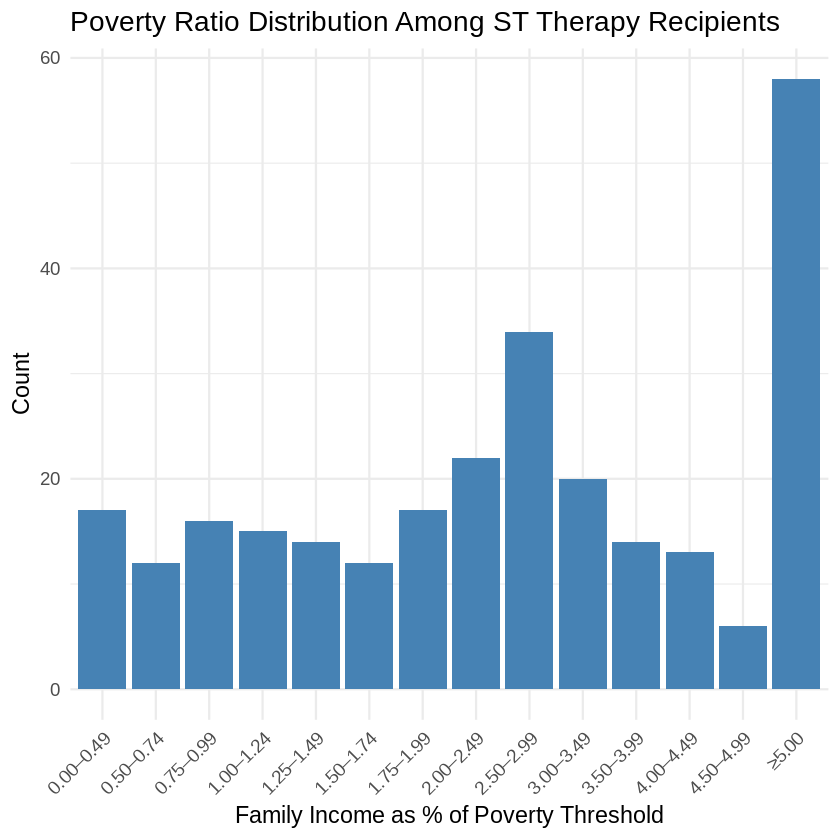

In [ ]:
library(dplyr)
library(ggplot2)

# 1. Filter to only ST therapy recipients
recipients <- data %>%
  filter(ST_Therapy == "Yes")

# 2a. Base‐R frequency table
tab <- table(recipients$PovertyRatio, useNA = "ifany")
print(tab)

# 2b. Base‐R percentages
print(round(prop.table(tab) * 100, 1))

# 3. dplyr summary with counts & percentages
recipients %>%
  count(PovertyRatio) %>%
  mutate(pct = round(n / sum(n) * 100, 1)) %>%
  arrange(PovertyRatio) %>%
  print()

# 4. (Optional) Bar chart of the distribution
ggplot(recipients, aes(x = PovertyRatio)) +
  geom_bar(fill = "steelblue") +
  labs(
    title = "Poverty Ratio Distribution Among ST Therapy Recipients",
    x = "Family Income as % of Poverty Threshold",
    y = "Count"
  ) +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
# Load necessary library if not already loaded
library(dplyr)
library(tidyr) # This line is essential if you're using complete() later in your code

# Read in the data
data <- read.csv("child22recoded.csv", stringsAsFactors = FALSE)

# ... (Your existing code for data manipulation) ...

# Save the modified data as finalchild22recode.csv
write.csv(data, "finalchild22recode.csv", row.names = FALSE)

In [ ]:
install.packages("readr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readr)

In [ ]:
data <- read_csv("finalchild22recode.csv")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 7464 Columns: 438
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): HHX, FoodInsecurity, FoodAccessDifficulty, Income_Group, Ethnicit...
dbl (424): URBRRL, RATCAT_C, INCTCFLG_C, IMPINCFLG_C, PPSU, PSTRAT, HISPALLP...
lgl   (8): OGFLGR_C, OGHDHPR_C, OPFLG_C, CHFLG_C, MAFLG_C, PRPLCOV2_C, EQWLK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(data)  # View the first few rows
   str(data)   # See the structure of the data (columns, data types)

URBRRL,RATCAT_C,INCTCFLG_C,IMPINCFLG_C,PPSU,PSTRAT,HISPALLP_C,RACEALLP_C,SDQIMPTOT_C,SDQTOT_C,⋯,RELCHPARENTP2_C,WTFA_C,HHX,POVRATTC_C,FoodInsecurity,FoodAccessDifficulty,Income_Wages,Income_Group,Ethnicity,ST_Therapy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,14,1,0,2,115,2,1,NA,2,⋯,1,19296.837,H053192,11.00,High Food Insecurity,Very Difficult,1,Low Income,Non-Hispanic,NA
4,4,0,0,3,122,2,1,NA,3,⋯,4,19620.702,H040577,1.07,High Food Insecurity,Very Difficult,1,Low Income,Non-Hispanic,NA
3,11,0,0,1,103,3,2,NA,NA,⋯,4,8284.925,H033338,3.66,High Food Insecurity,Very Difficult,1,Low Income,Non-Hispanic,NA
3,13,0,0,4,103,3,2,2,15,⋯,4,10907.508,H028319,4.55,High Food Insecurity,Very Difficult,1,Low Income,Non-Hispanic,NA
3,2,0,0,2,103,3,2,0,8,⋯,4,24148.818,H001424,0.56,High Food Insecurity,Somewhat Difficult,1,Low Income,Non-Hispanic,NA
3,14,0,0,1,111,2,1,NA,6,⋯,1,2294.606,H004139,6.18,High Food Insecurity,Very Difficult,1,Low Income,Non-Hispanic,NA


spc_tbl_ [7,464 × 438] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ URBRRL                   : num [1:7464] 1 4 3 3 3 3 3 3 3 1 ...
 $ RATCAT_C                 : num [1:7464] 14 4 11 13 2 14 14 11 11 14 ...
 $ INCTCFLG_C               : num [1:7464] 1 0 0 0 0 0 0 0 0 0 ...
 $ IMPINCFLG_C              : num [1:7464] 0 0 0 0 0 0 0 0 0 0 ...
 $ PPSU                     : num [1:7464] 2 3 1 4 2 1 1 1 1 3 ...
 $ PSTRAT                   : num [1:7464] 115 122 103 103 103 111 111 143 111 138 ...
 $ HISPALLP_C               : num [1:7464] 2 2 3 3 3 2 2 3 4 2 ...
 $ RACEALLP_C               : num [1:7464] 1 1 2 2 2 1 1 2 3 1 ...
 $ SDQIMPTOT_C              : num [1:7464] NA NA NA 2 0 NA NA NA NA 0 ...
 $ SDQTOT_C                 : num [1:7464] 2 3 NA 15 8 6 6 NA NA 9 ...
 $ SDQPROS_C                : num [1:7464] 10 10 NA 10 9 10 10 NA NA 8 ...
 $ SDQPEER_C                : num [1:7464] 0 1 NA 3 2 2 2 NA NA 3 ...
 $ SDQHYPE_C                : num [1:7464] 2 0 NA 7 5 3 2 NA NA 4 ...
 $ SDQCOND_C 

In [ ]:
library(dplyr)

data <- data %>%
  mutate(
    IncomeGroup = case_when(
      RATCAT_C %in% 1:3  ~ "Low Income (Below Poverty)",
      RATCAT_C %in% 4:7  ~ "Middle Income",
      RATCAT_C %in% 8:14 ~ "High Income",
      TRUE               ~ NA_character_
    ),
    IncomeGroup = factor(
      IncomeGroup,
      levels = c("Low Income (Below Poverty)", "Middle Income", "High Income")
    )
  )

# Check the new distribution
data %>% count(IncomeGroup) %>% mutate(pct = n/sum(n)*100)
data %>% filter(ST_Therapy == "Yes") %>% count(IncomeGroup) %>% mutate(pct = n/sum(n)*100)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




IncomeGroup,n,pct
<fct>,<int>,<dbl>
Low Income (Below Poverty),896,12.00429
Middle Income,1475,19.76152
High Income,5093,68.23419


IncomeGroup,n,pct
<fct>,<int>,<dbl>


In [ ]:
write_csv(data, "finalchild22NHIS.csv")